Universidad del Valle de Guatemala <br>
04/03/2022 <br>
Minería de Datos # 20 

# Hoja de Trabajo 3
## Árboles de Decisión

**Integrantes:**<br>
Walter Saldaña 19897 <br>
José Gutierrez 19111 <br>
Javier Cotto 19324 <br>

### Importar modulos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### Carga de datos

In [3]:
entrenamiento = pd.read_csv('train.csv', encoding='unicode_escape')
entrenamiento.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
prueba = pd.read_csv('test.csv', encoding='unicode_escape')
prueba.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 2) Preprocesamiento de los datos.

Remover variables cualitativas que no aportan, ya que no son categóricas, y sus frecuencias no pueden ser clasificadas.

In [4]:
entrenamiento = entrenamiento.drop(['Street', 'Id', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                         'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle', 
                         'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
                         'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                         'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                         'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','PoolQC', 'Fence', 'MiscFeature', 
                         'SaleType', 'SaleCondition'], axis=1)


Eliminar filas que contengan datos nulos (NaN).

In [5]:
entrenamiento.dropna(subset = ["LotFrontage"], inplace = True)
entrenamiento.dropna(subset = ["MasVnrArea"], inplace = True)
entrenamiento.dropna(subset = ["GarageYrBlt"], inplace = True)


## Resumen estadístico de las variables

In [8]:
    entrenamiento.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,...,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,56.146298,70.665477,10122.956289,6.212310,5.561106,1972.264942,1985.683318,108.487957,438.399643,44.589652,...,92.610169,46.130241,21.844781,3.348796,16.100803,2.934880,23.429081,6.339875,2007.795718,185506.152542
std,41.772684,24.266812,8129.302641,1.380822,1.068236,30.967730,21.025974,189.500966,468.385038,157.828725,...,121.868623,64.390029,61.282083,29.772540,57.801829,40.222087,165.759816,2.687854,1.335043,82999.159004
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7590.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,131000.000000
50%,50.000000,70.000000,9416.000000,6.000000,5.000000,1974.000000,1995.000000,0.000000,374.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,164900.000000
75%,70.000000,80.000000,11361.000000,7.000000,6.000000,2003.000000,2005.000000,170.000000,702.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,219500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000


### Analisis de Datos

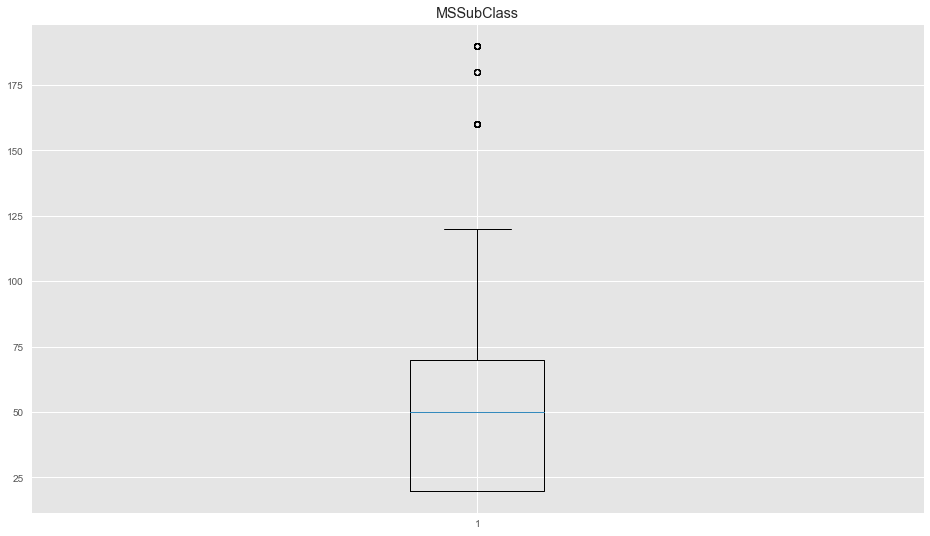

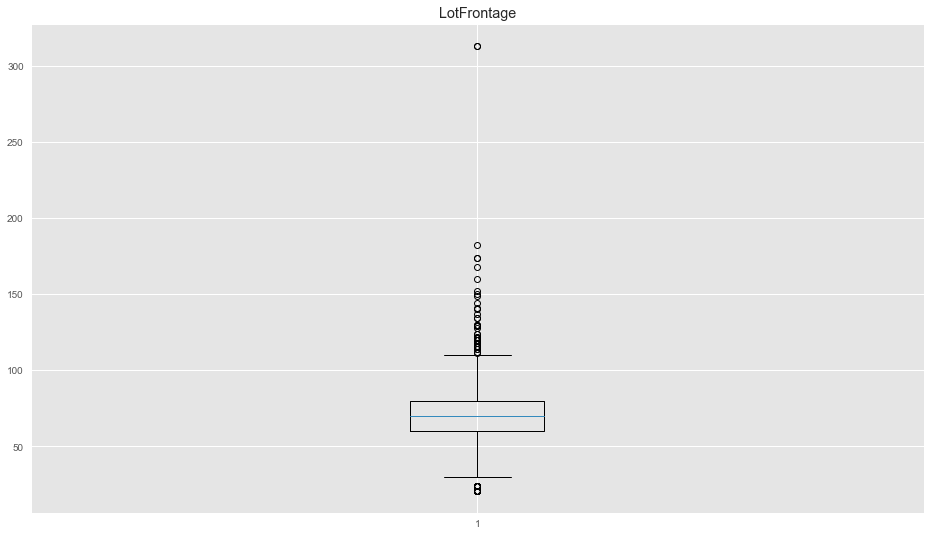

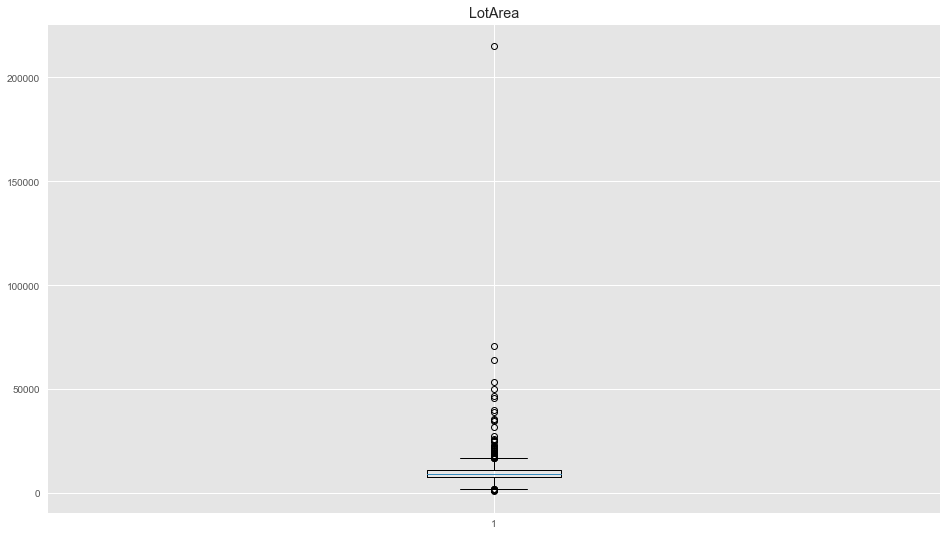

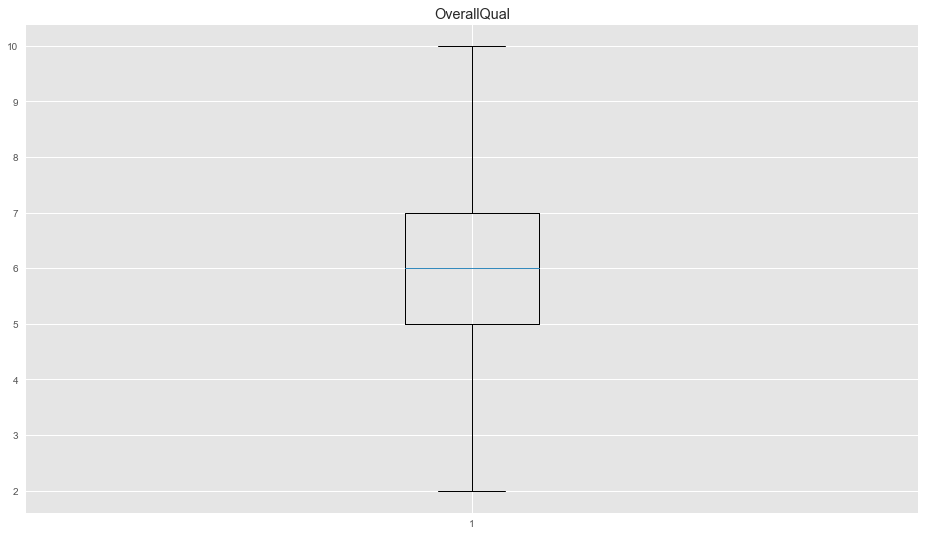

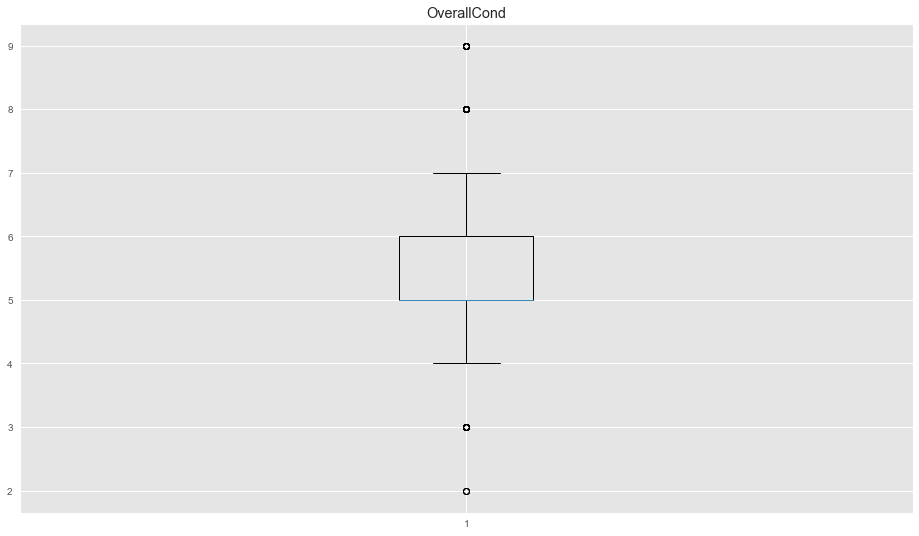

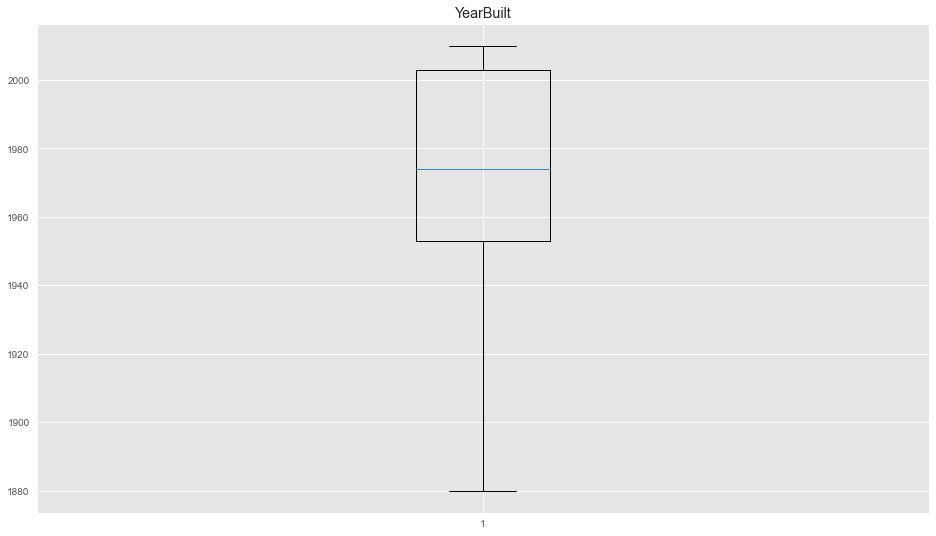

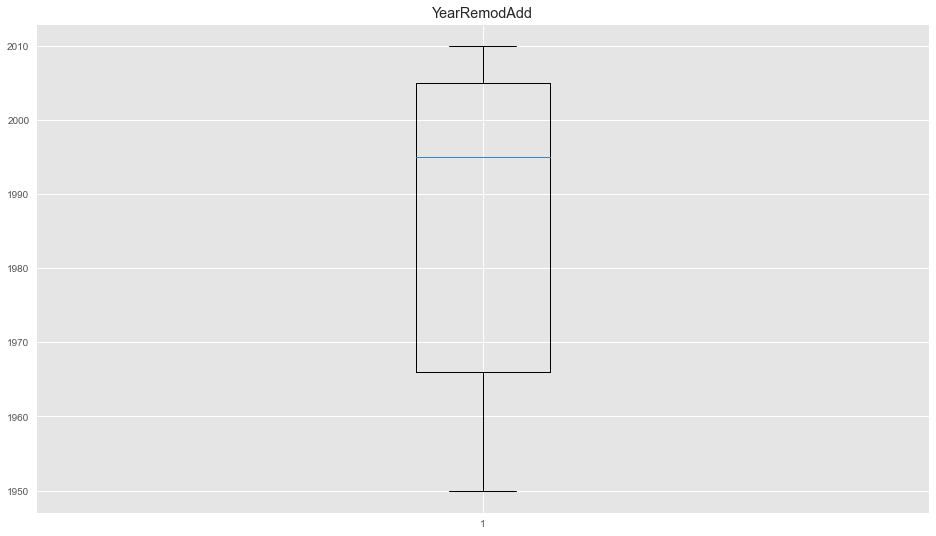

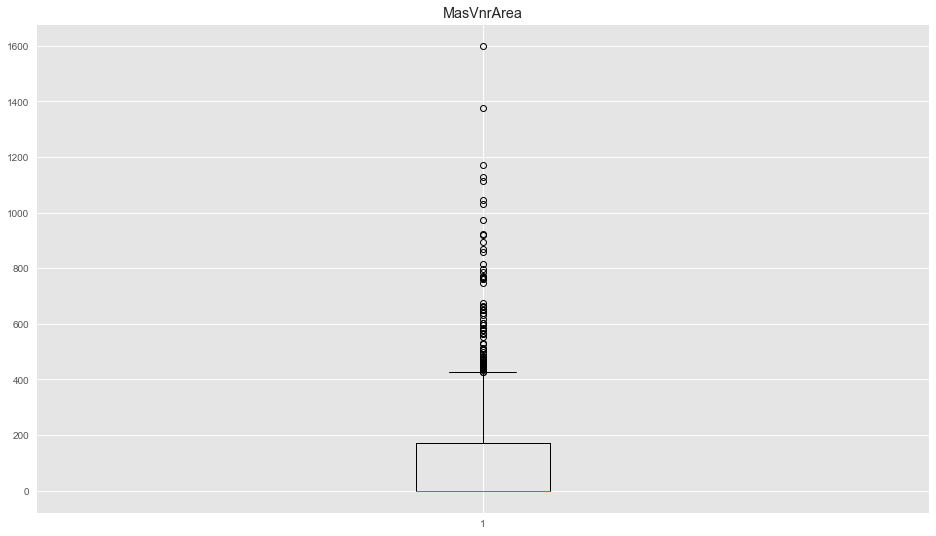

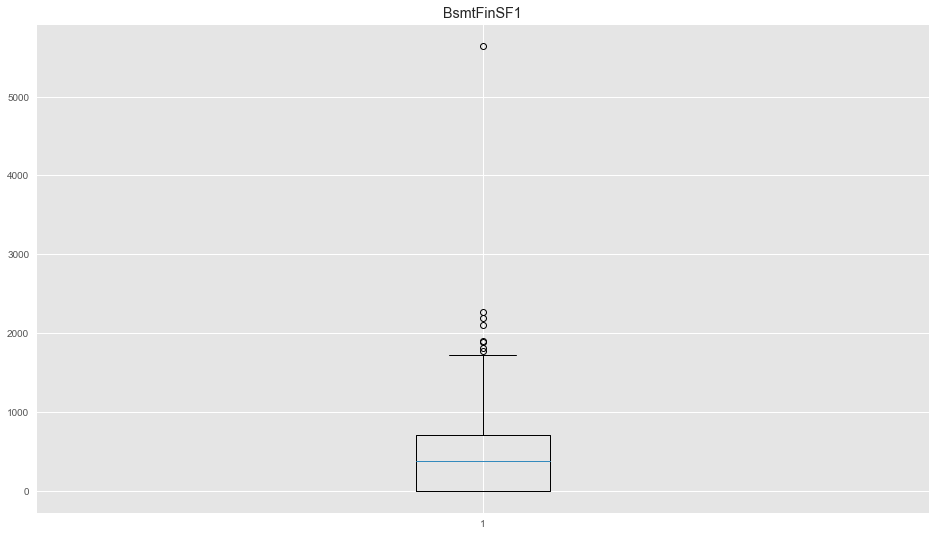

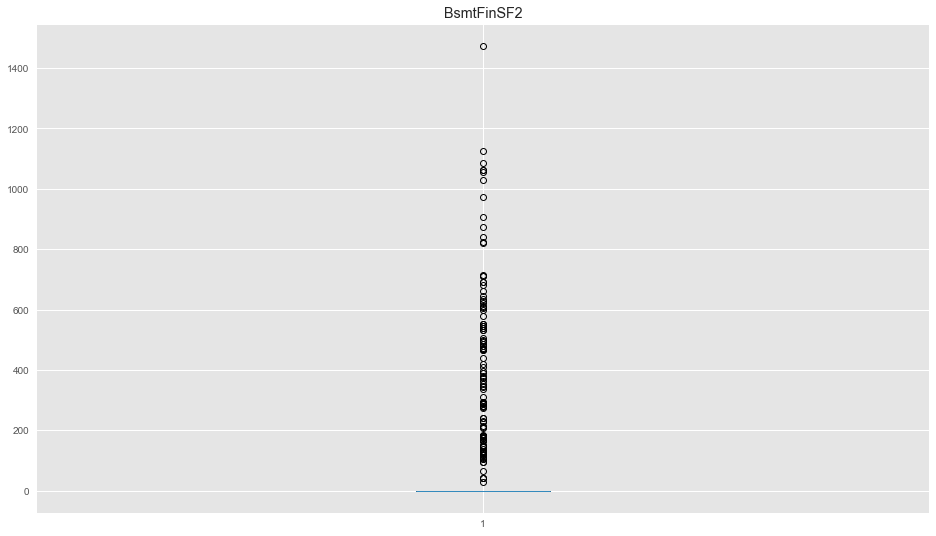

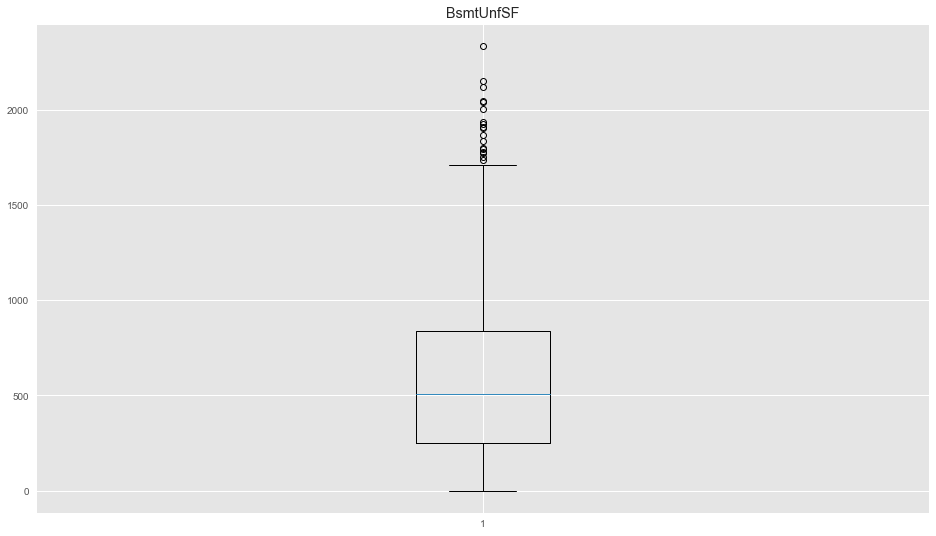

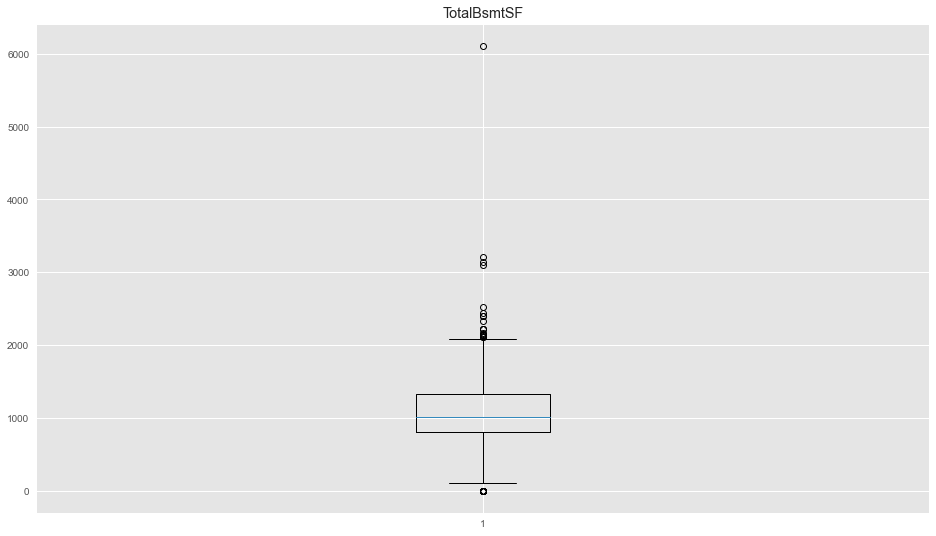

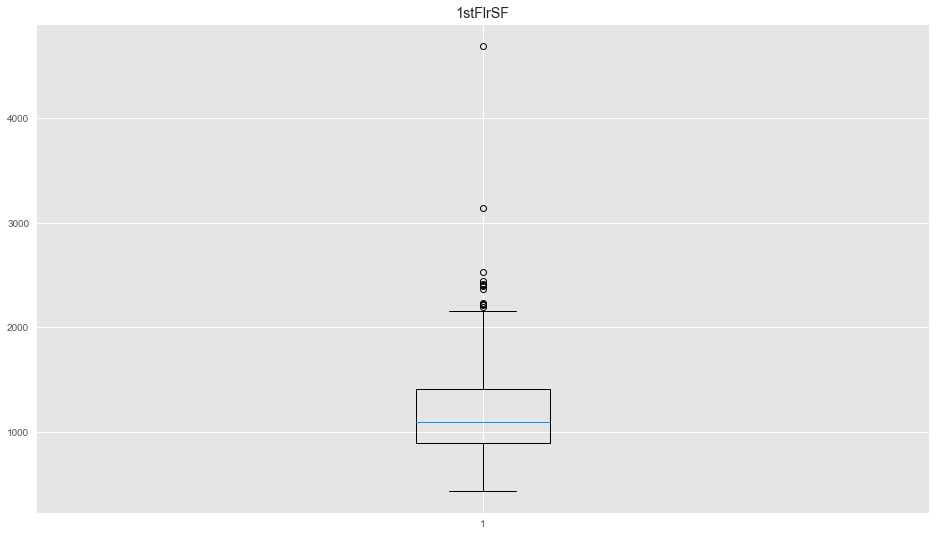

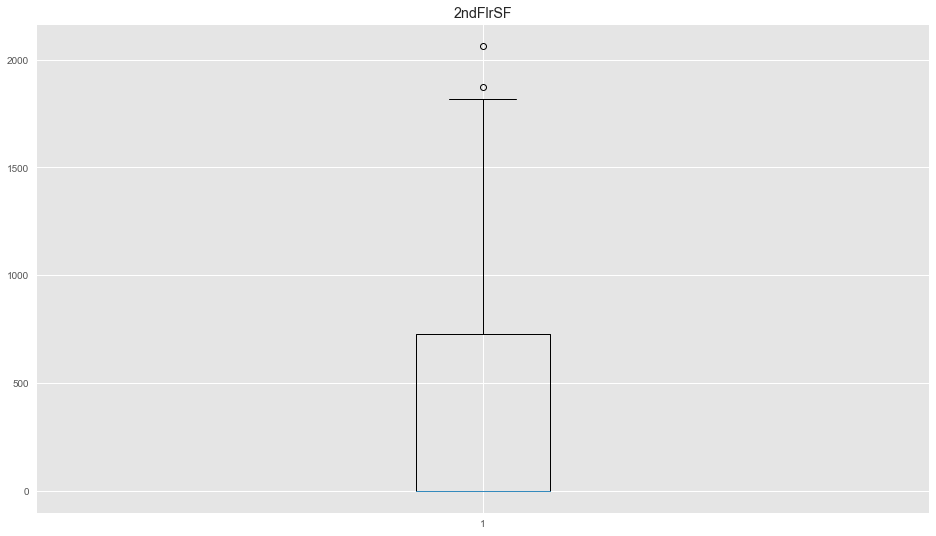

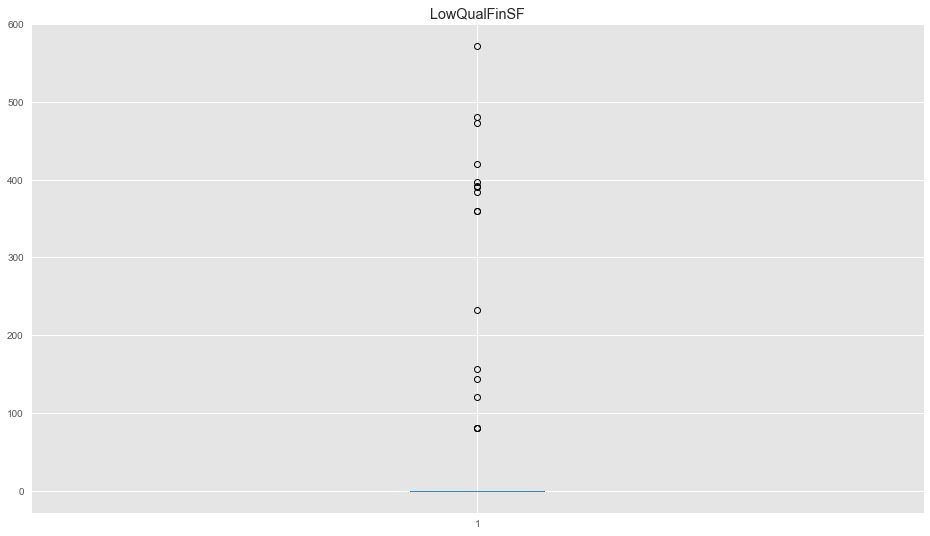

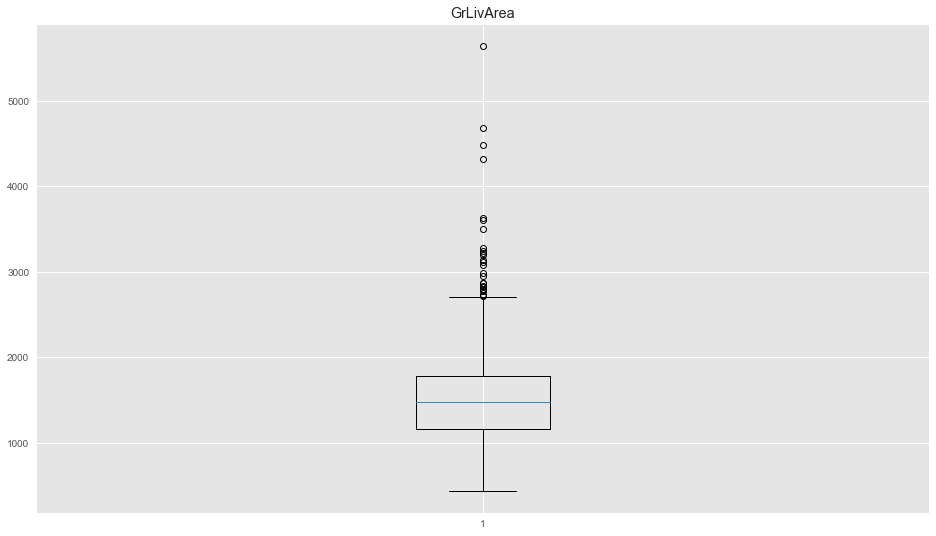

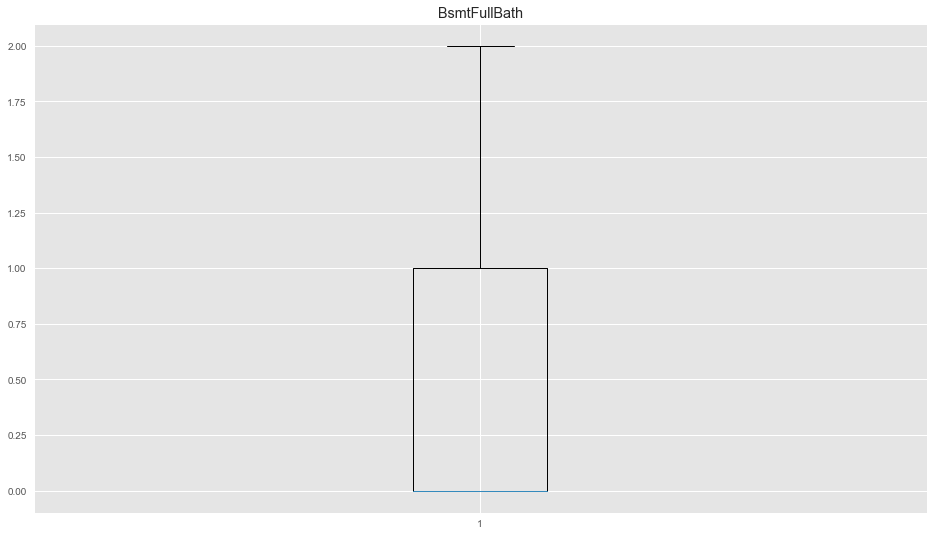

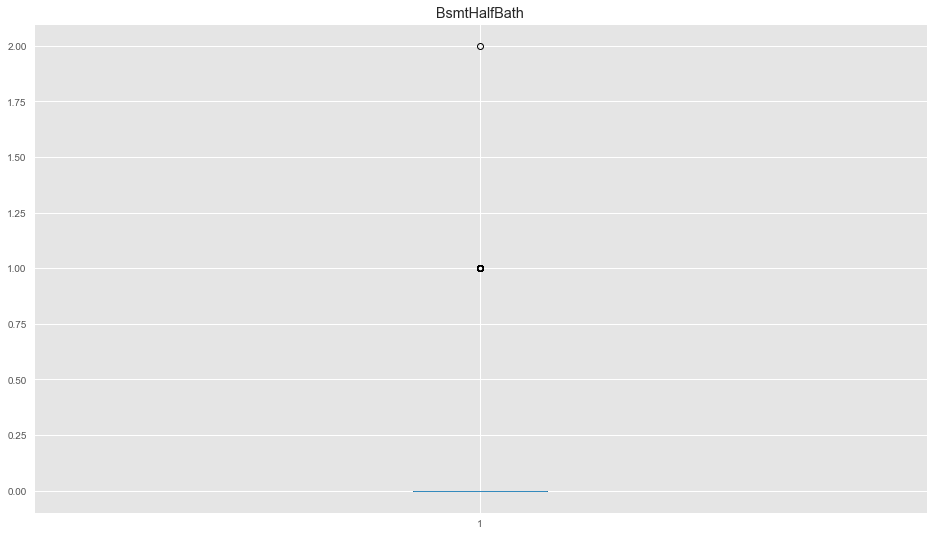

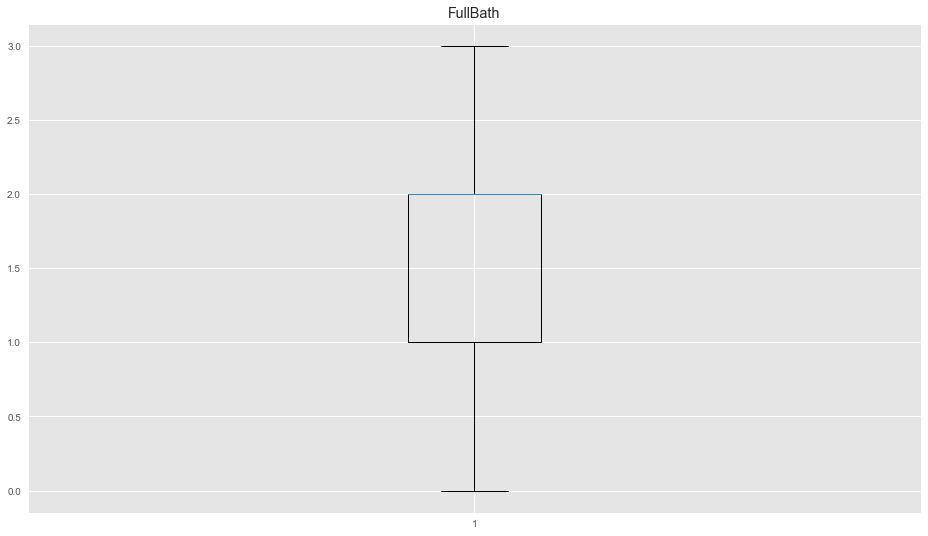

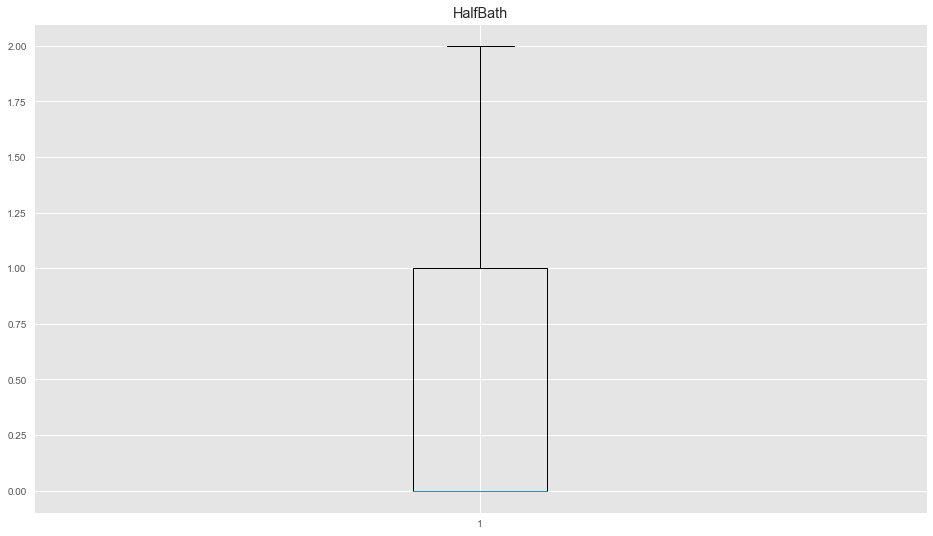

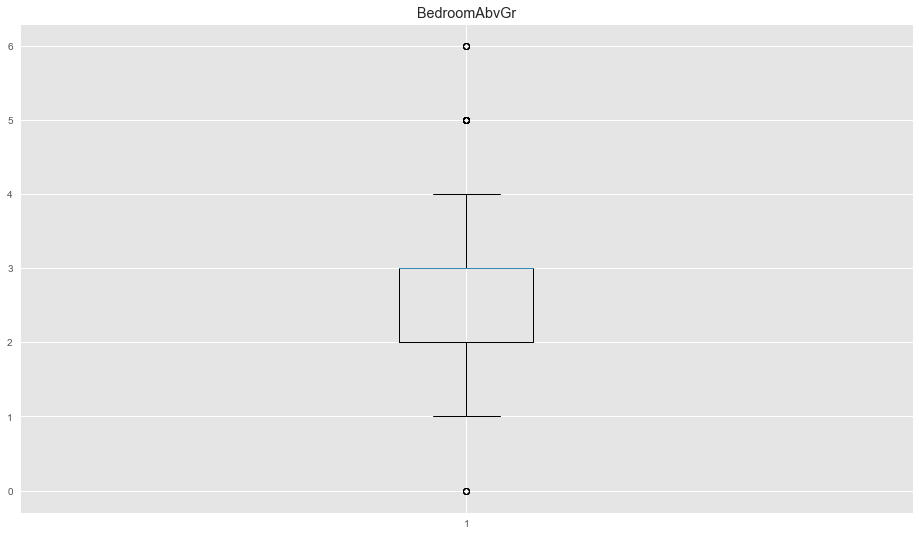

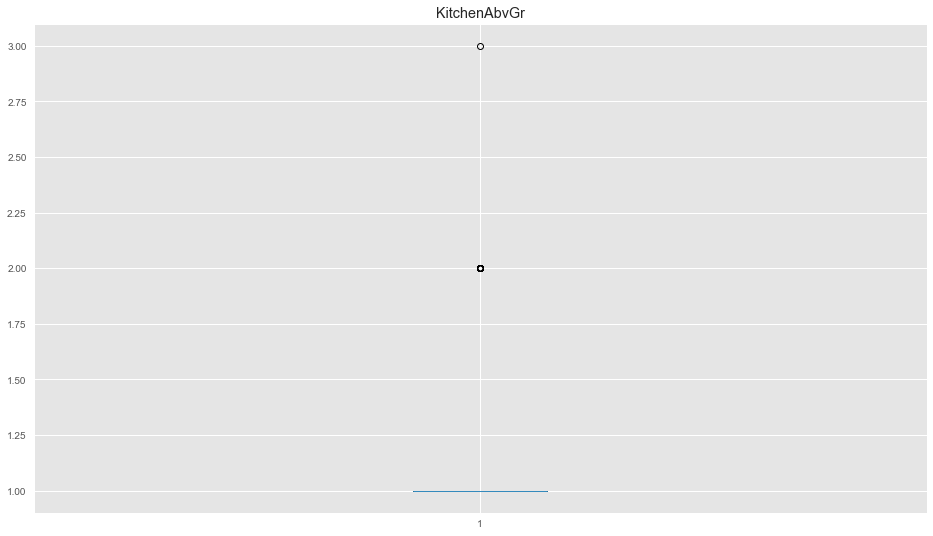

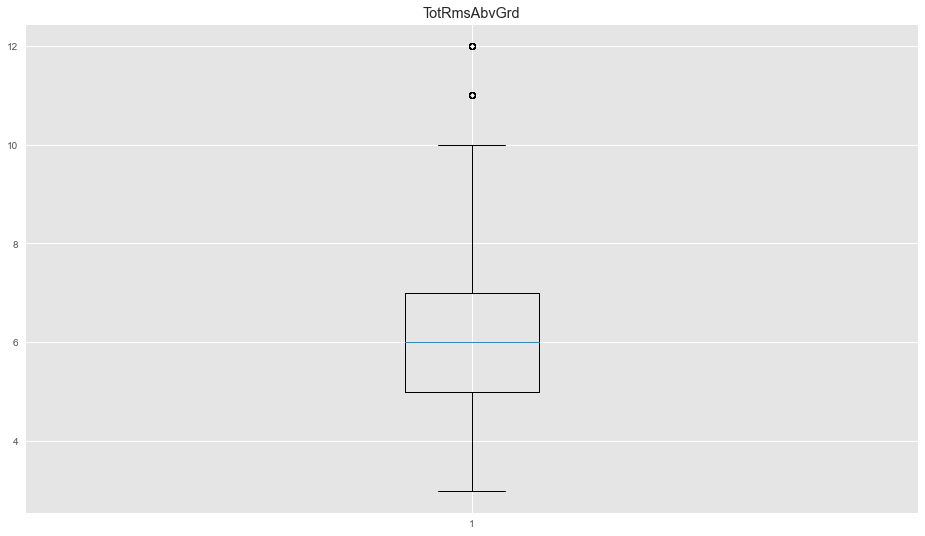

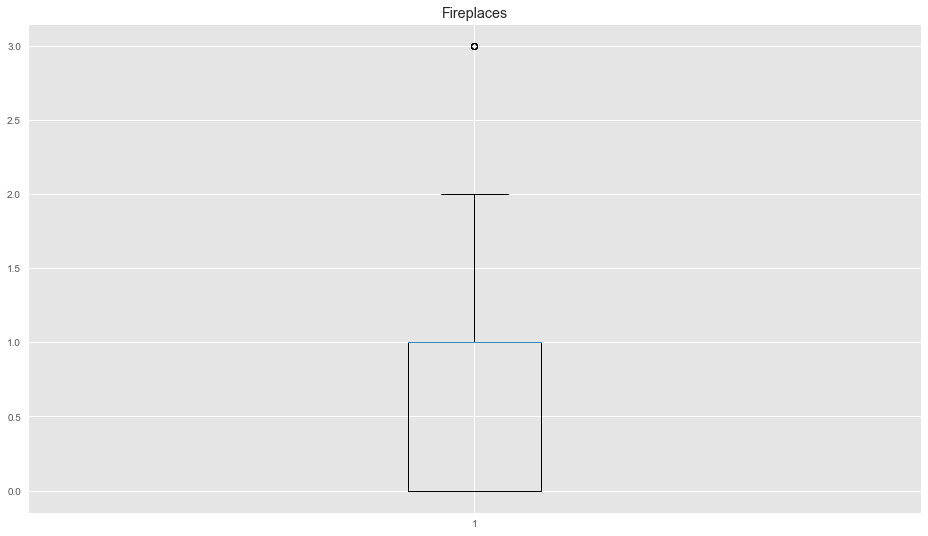

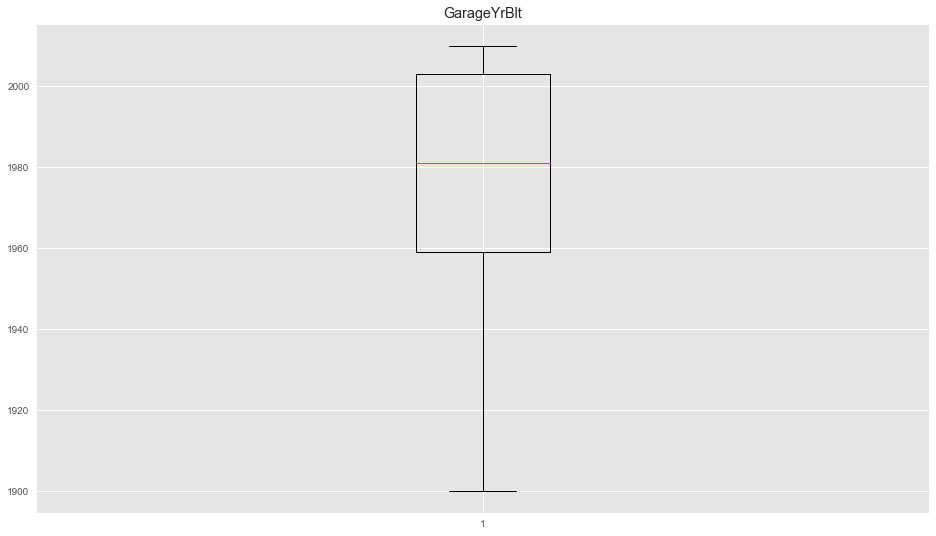

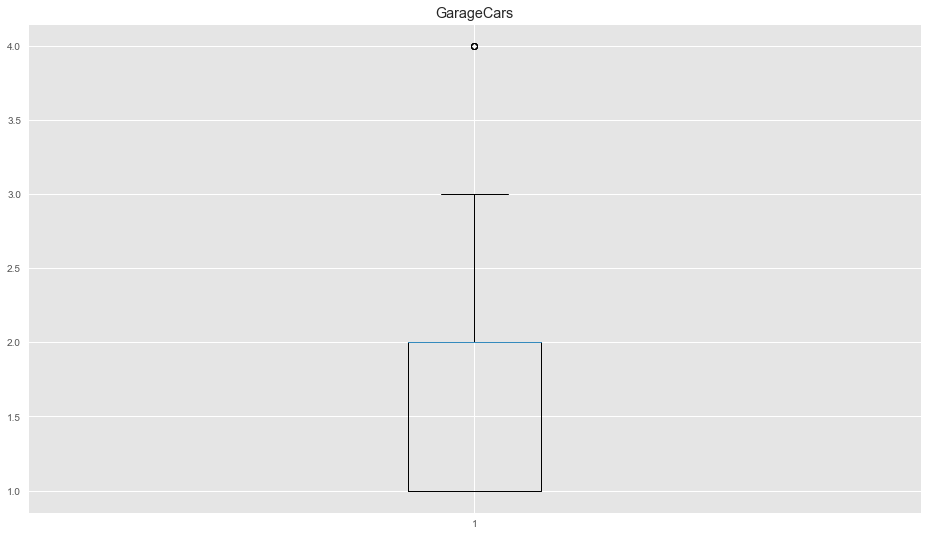

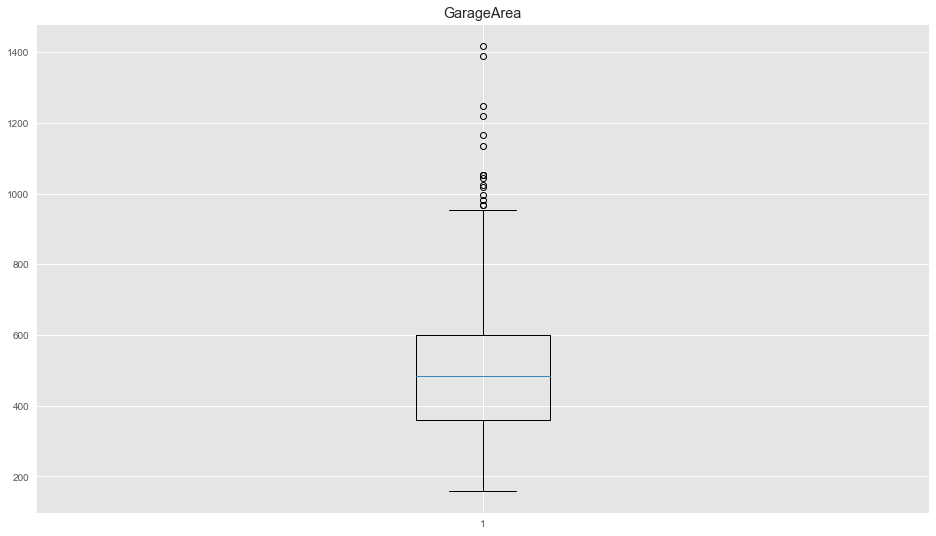

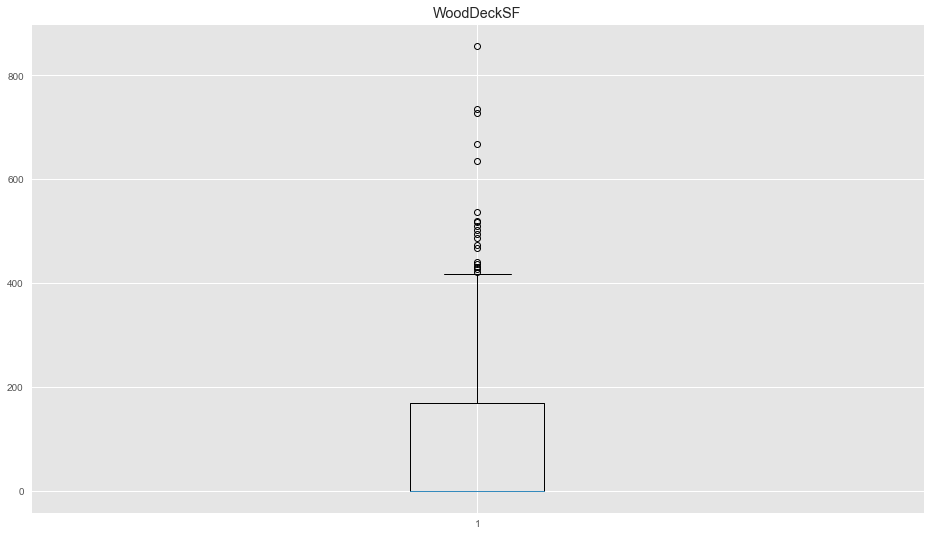

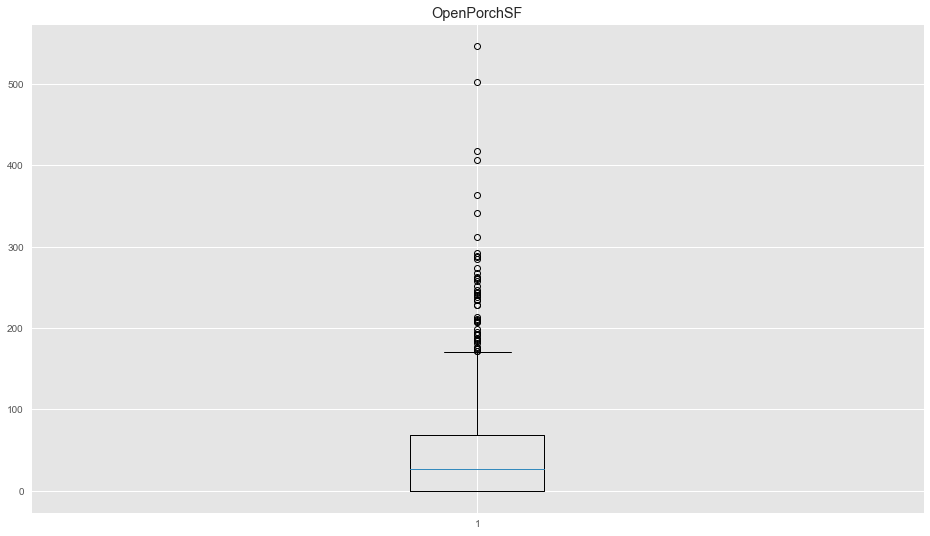

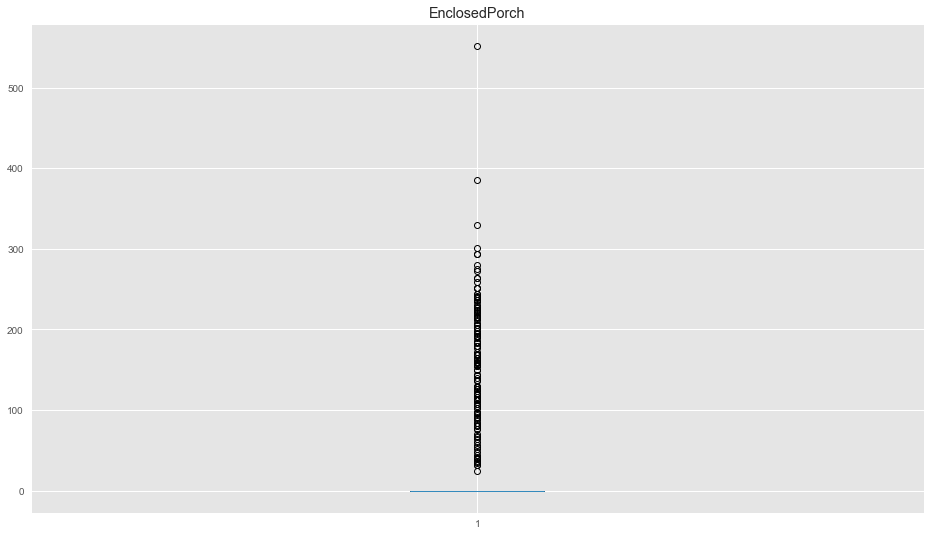

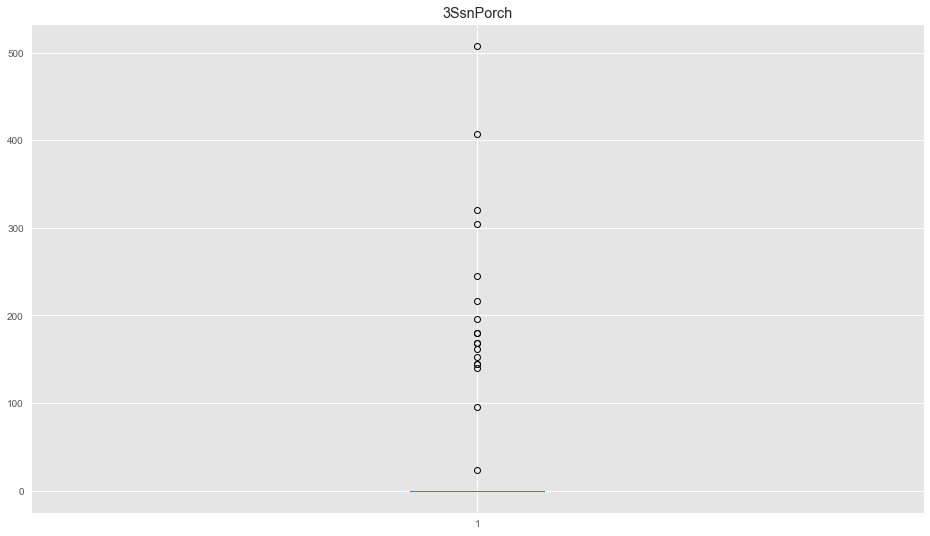

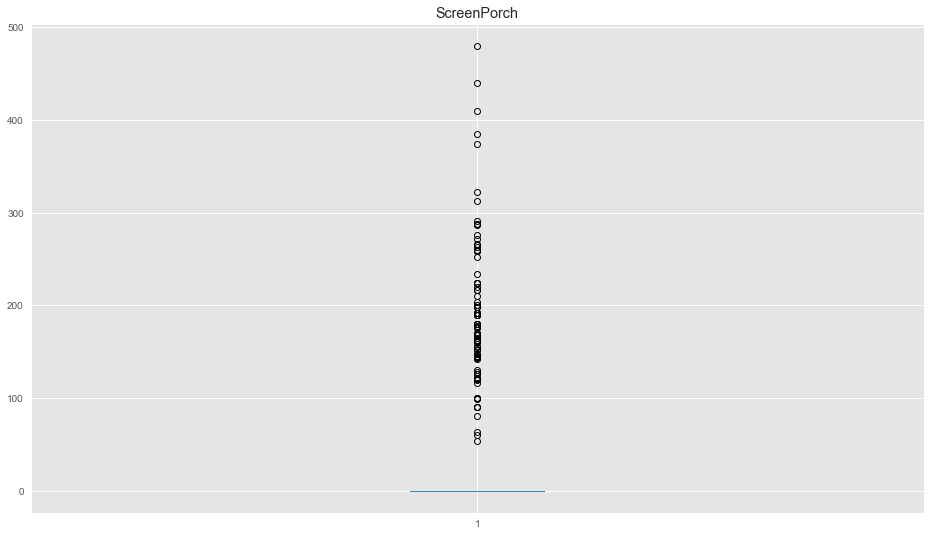

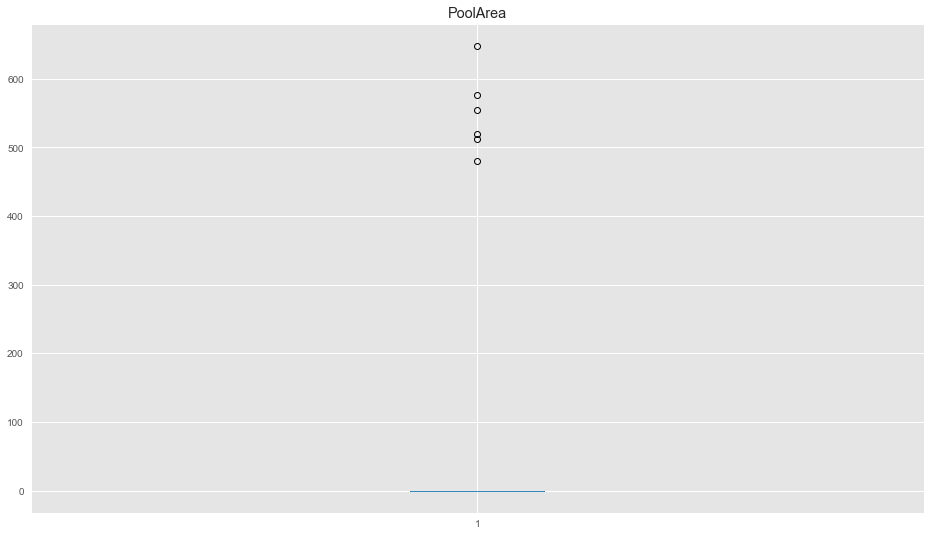

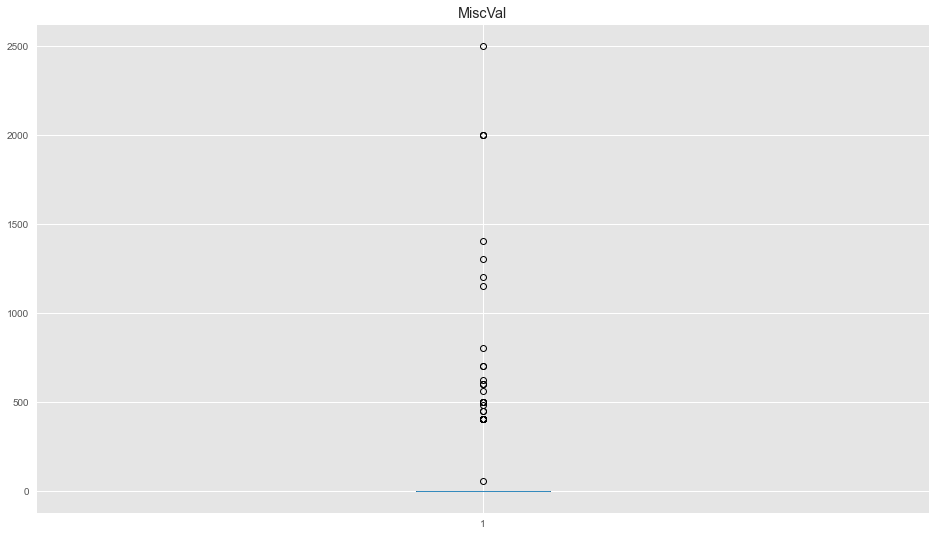

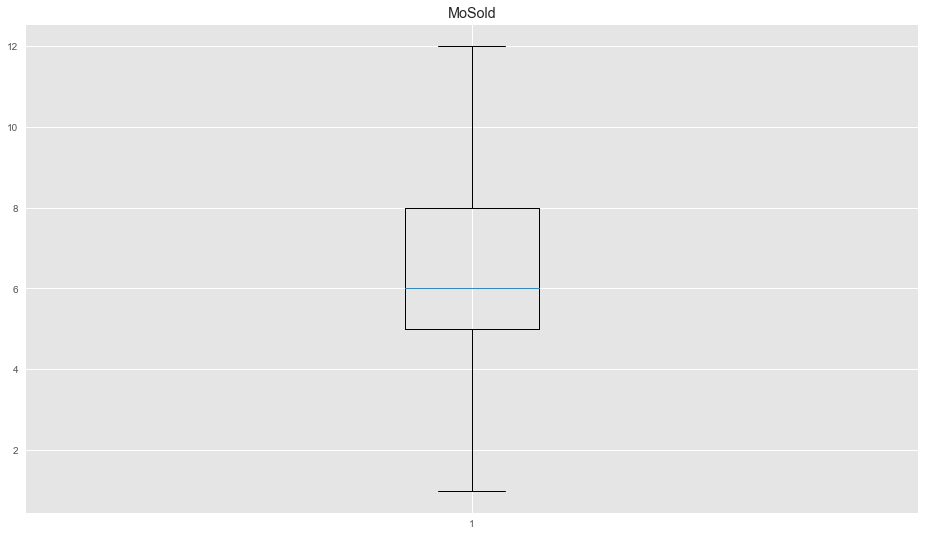

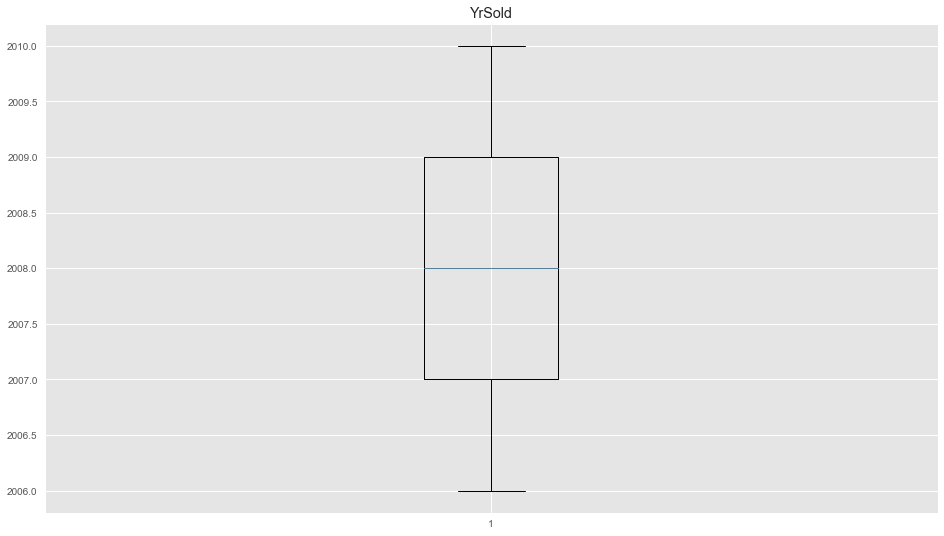

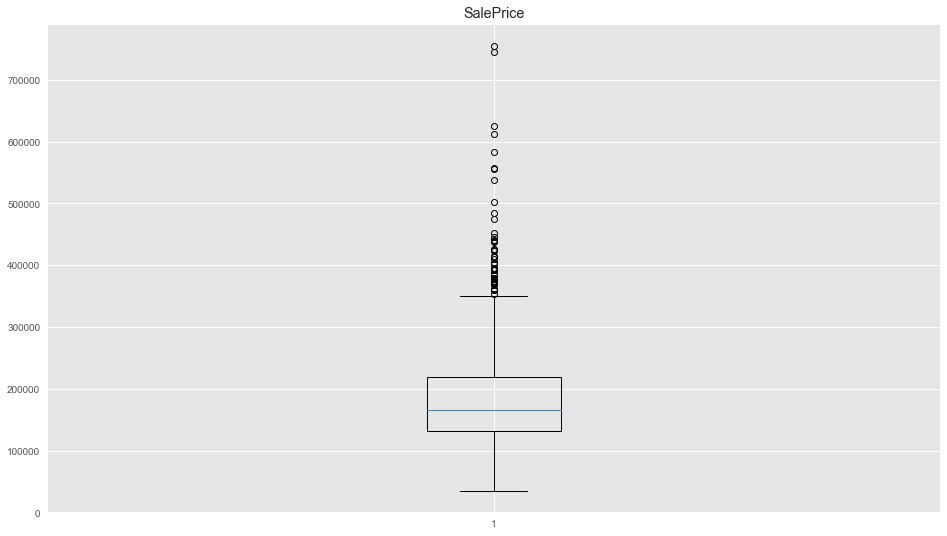

In [9]:
columns = []
for col in entrenamiento.columns:
    columns.append(col)
    
for columna in columns:
    plt.boxplot(entrenamiento[columna])
    plt.title(columna)
    plt.show()

### Eliminacion de datos atipicos

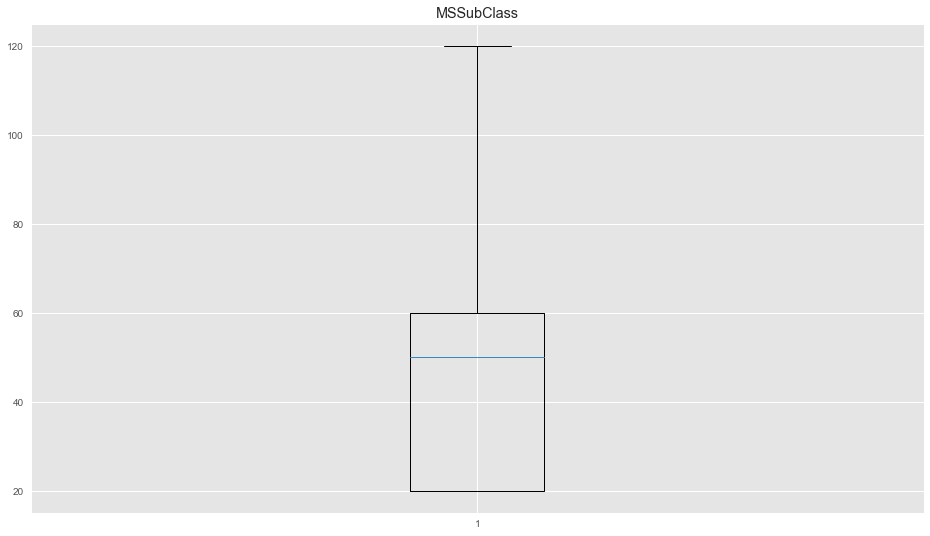

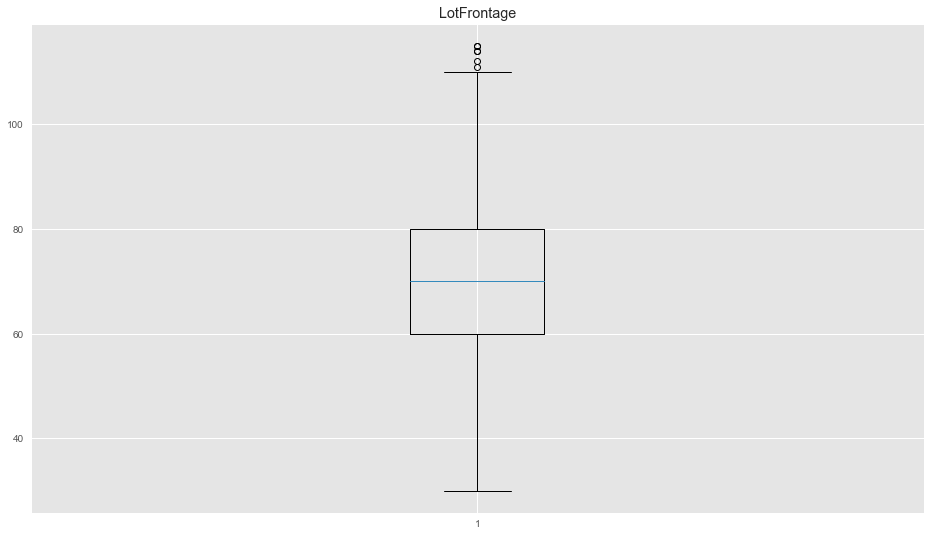

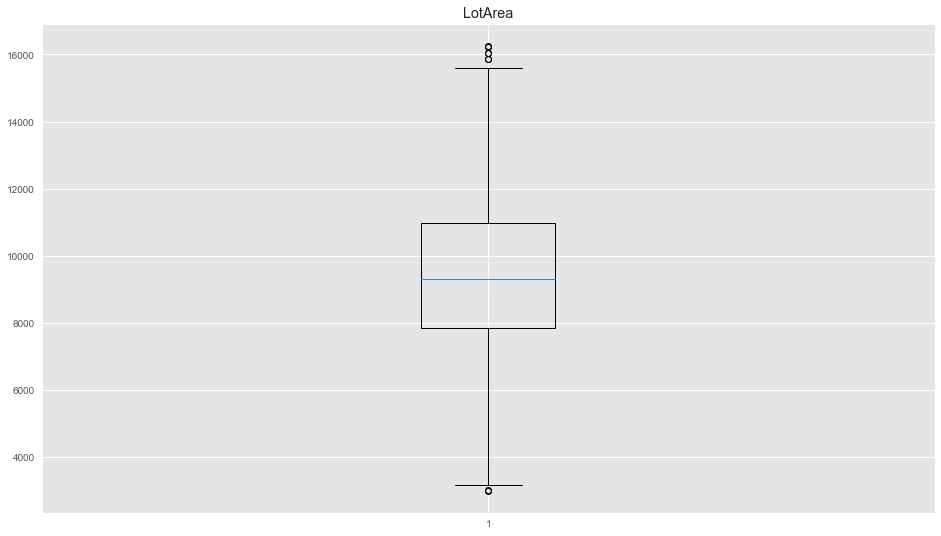

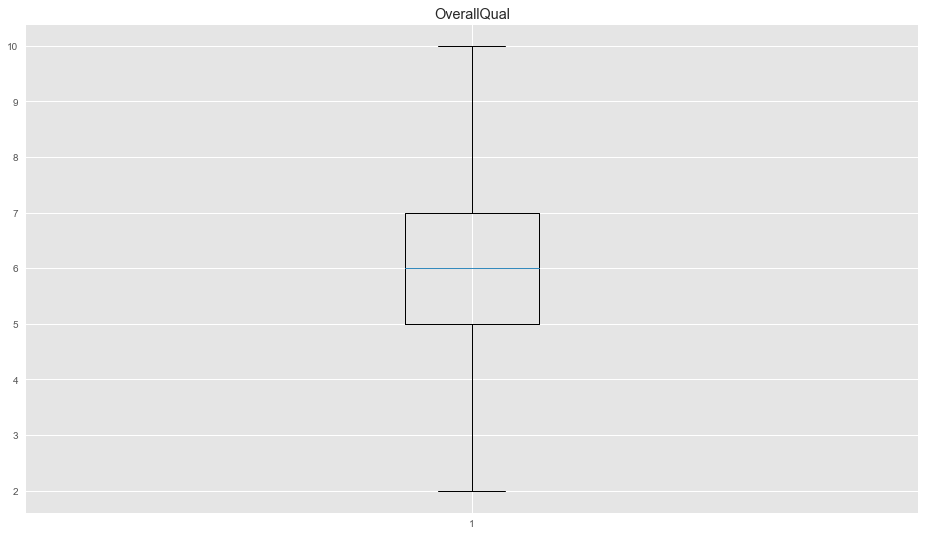

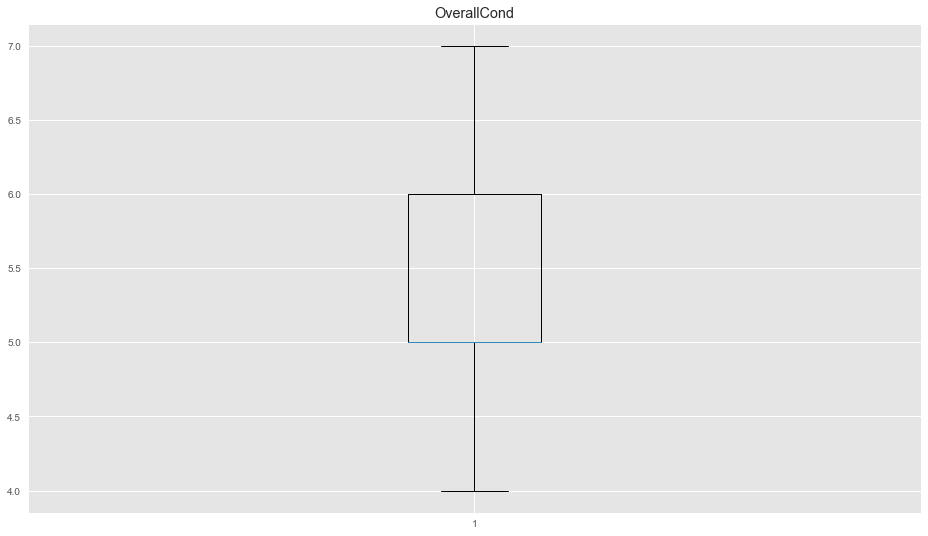

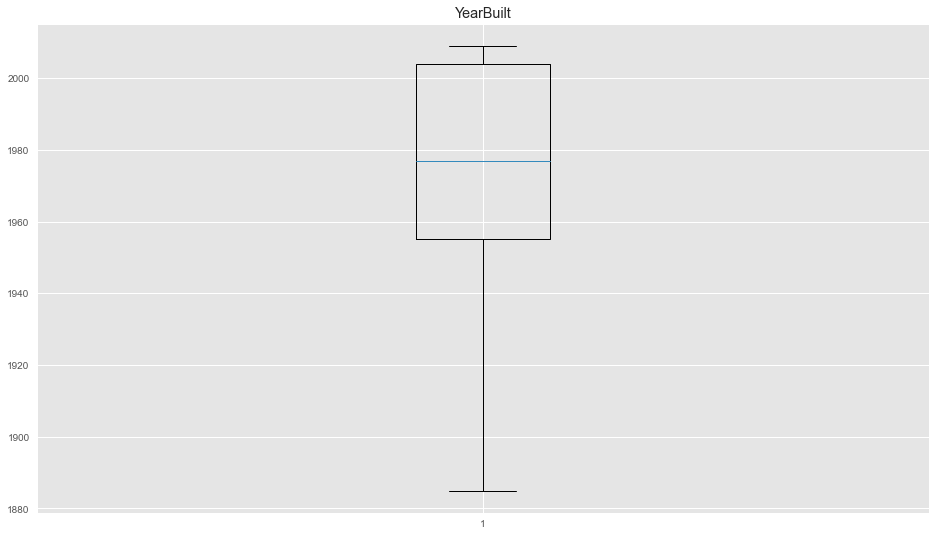

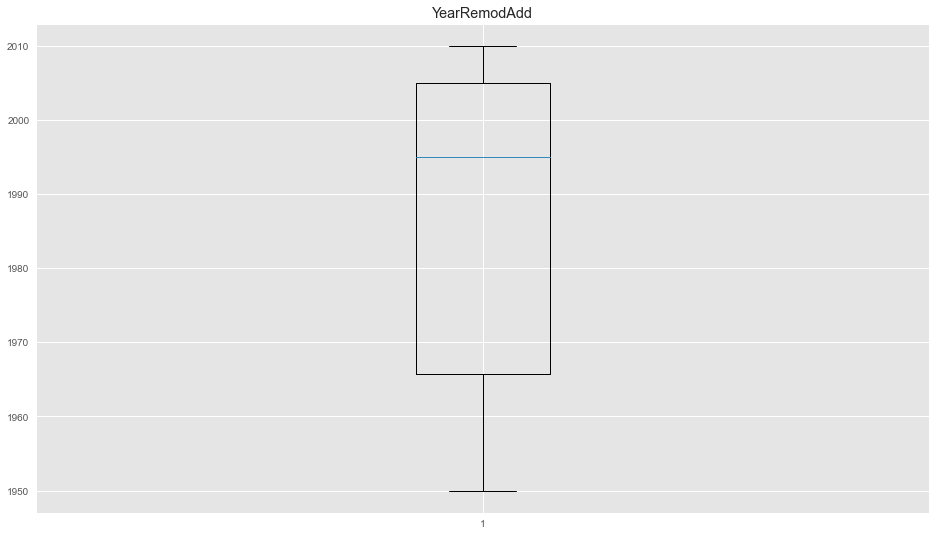

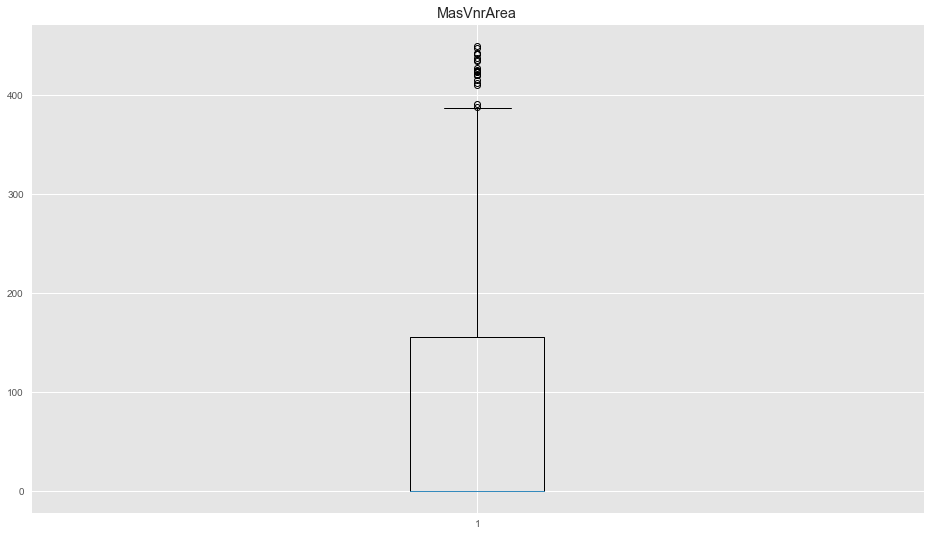

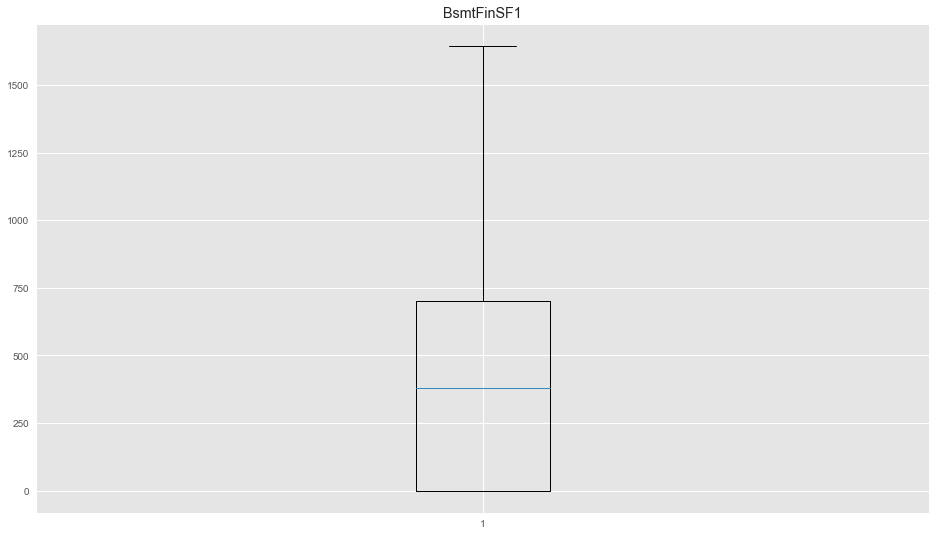

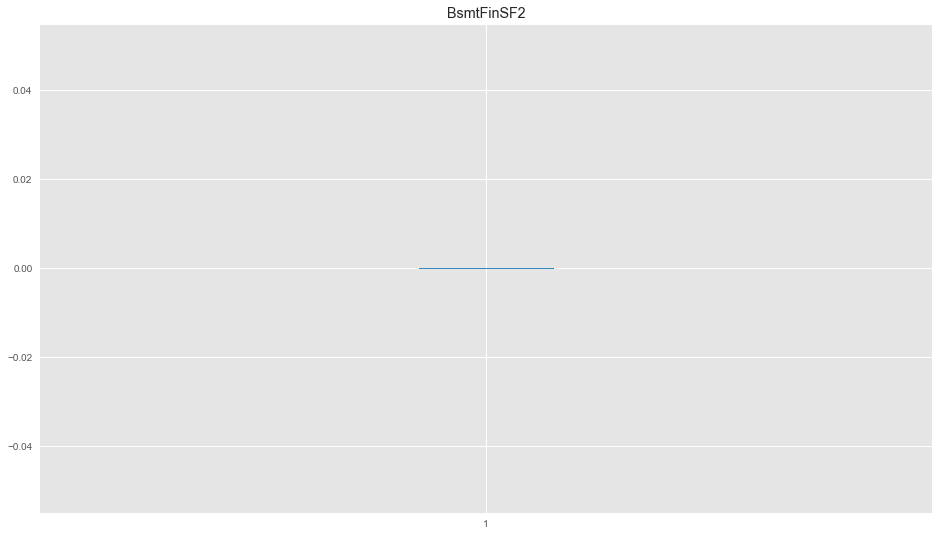

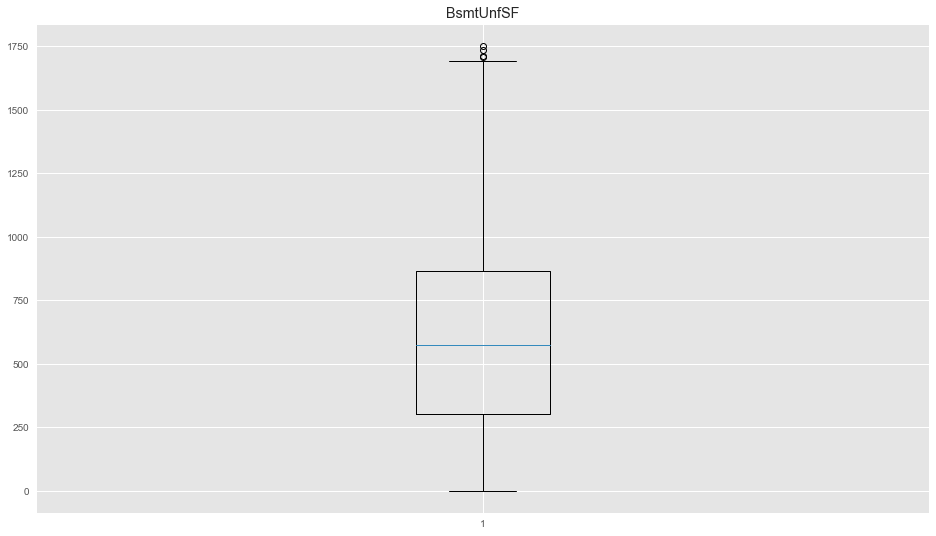

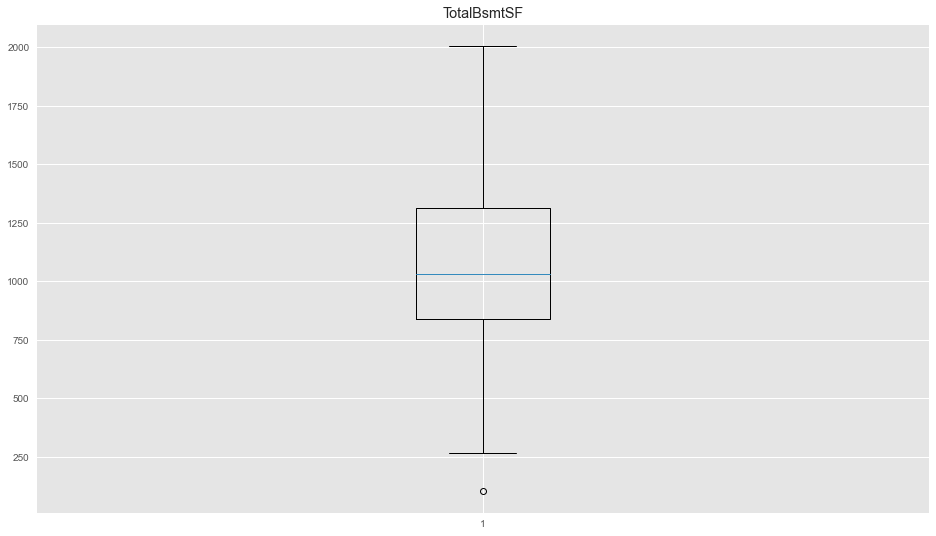

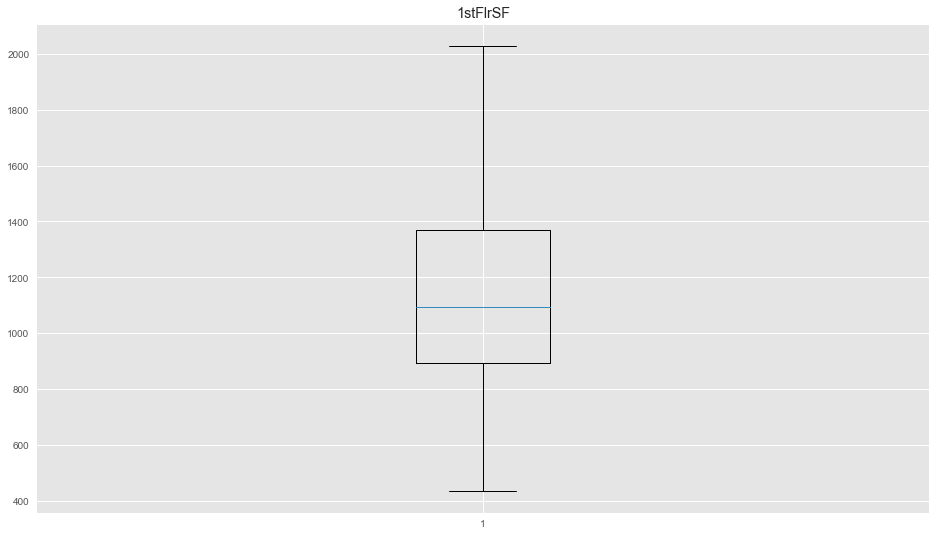

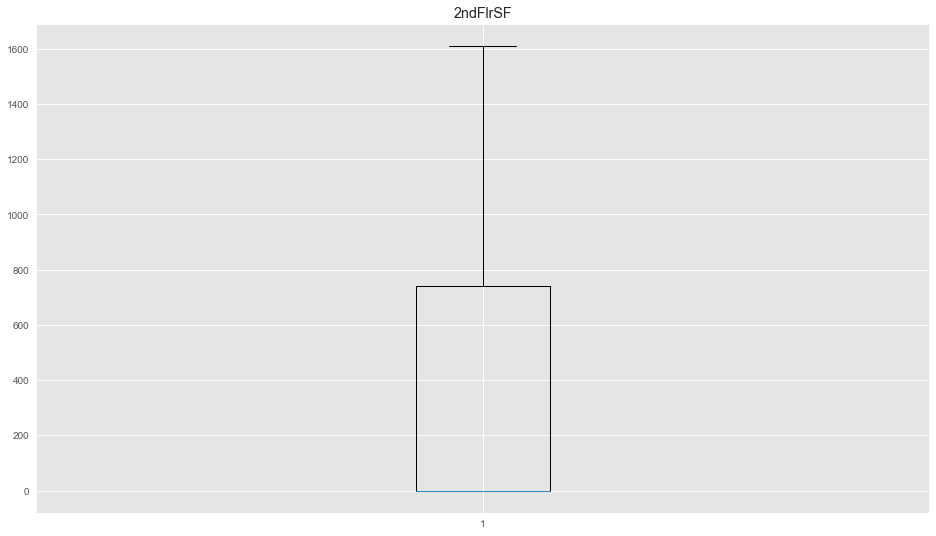

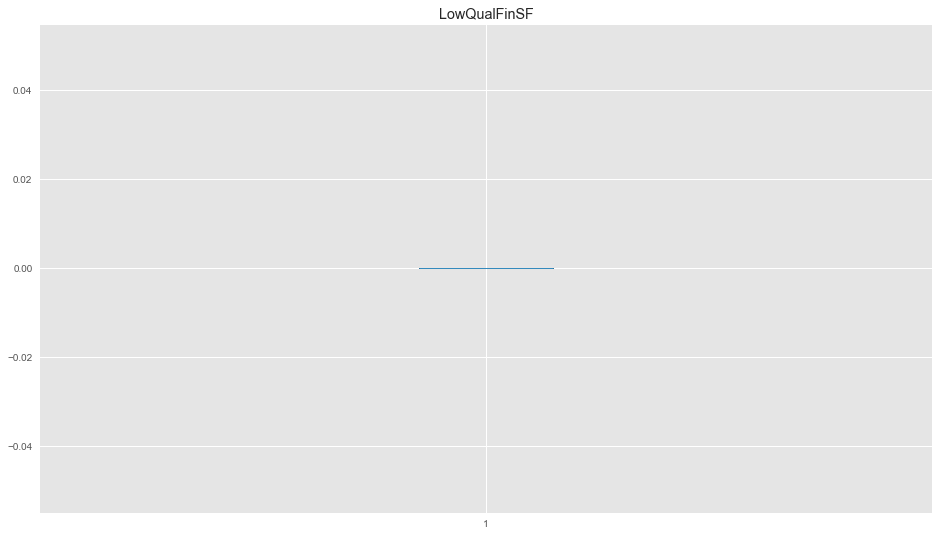

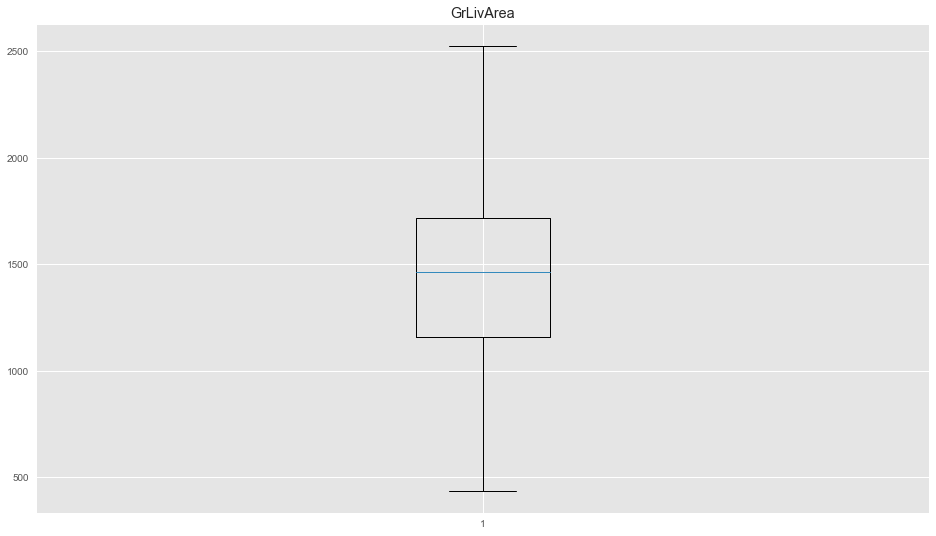

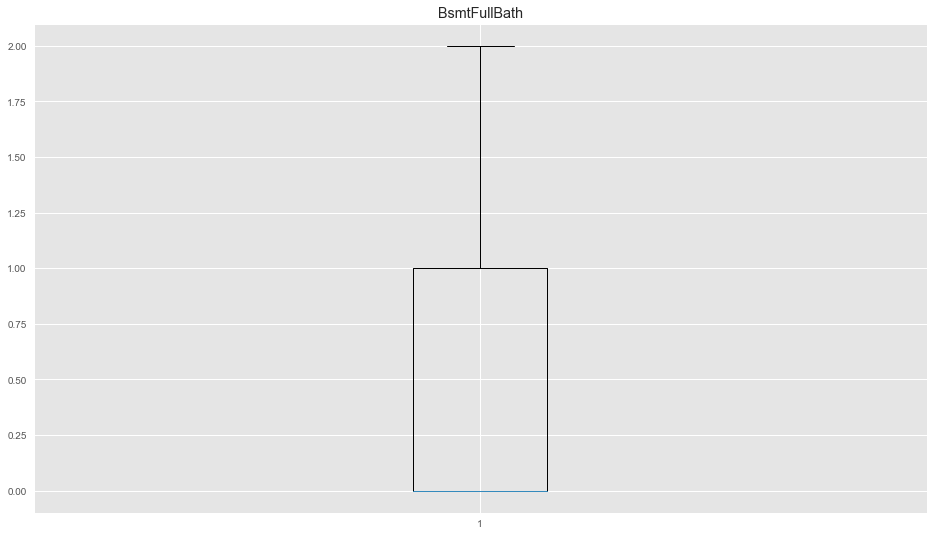

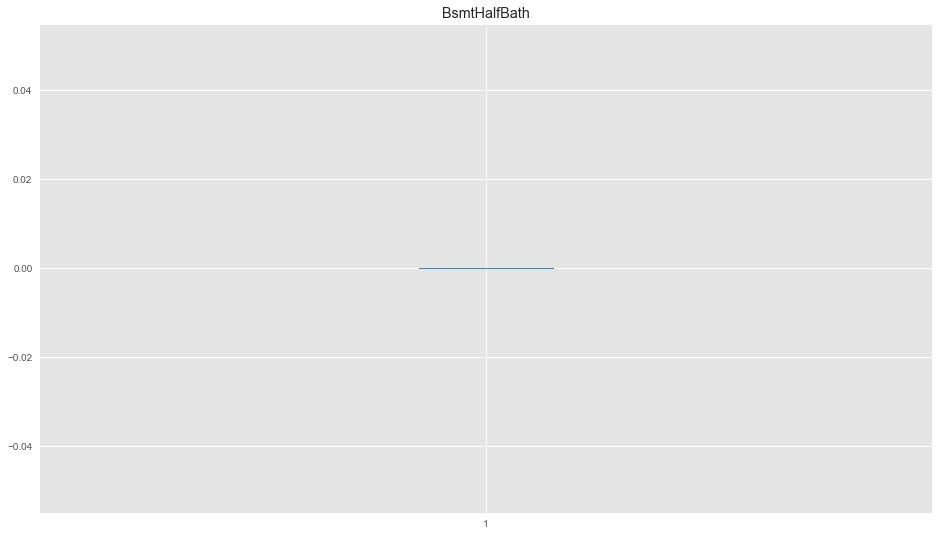

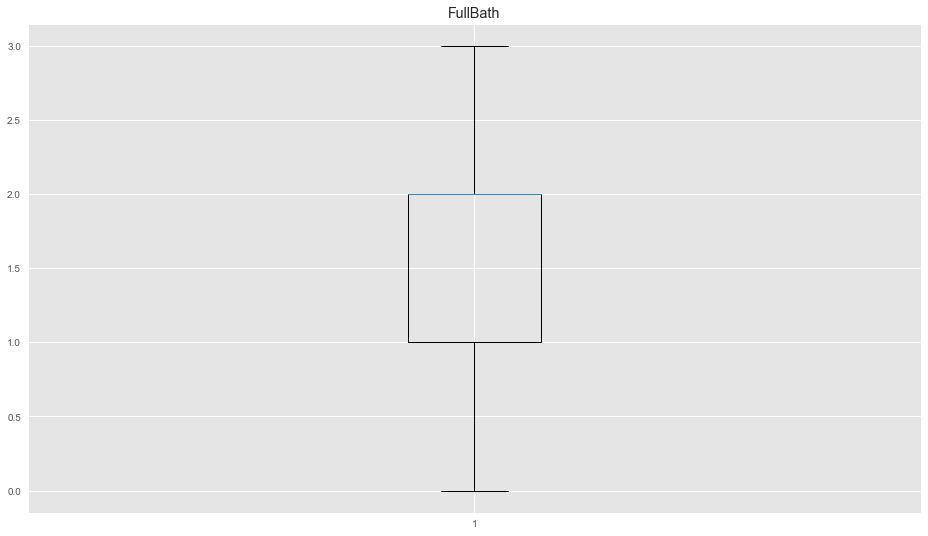

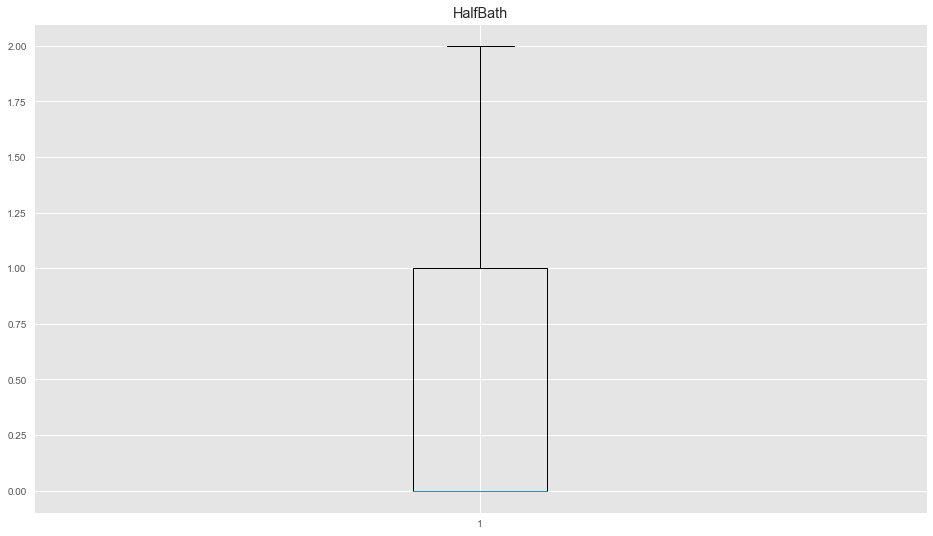

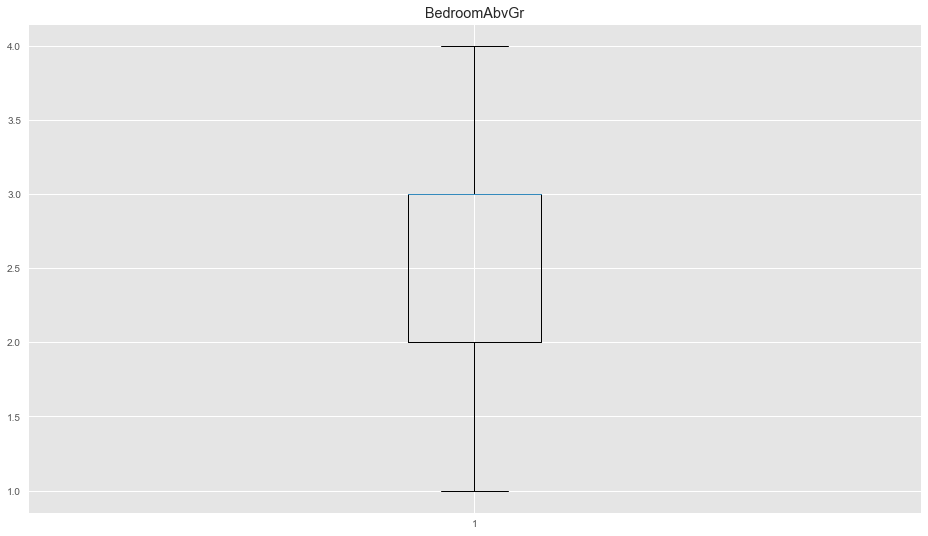

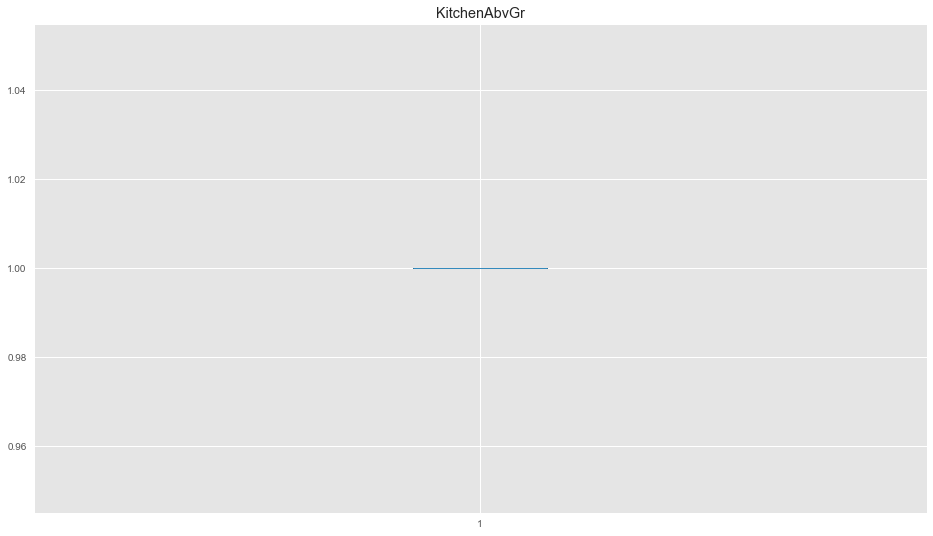

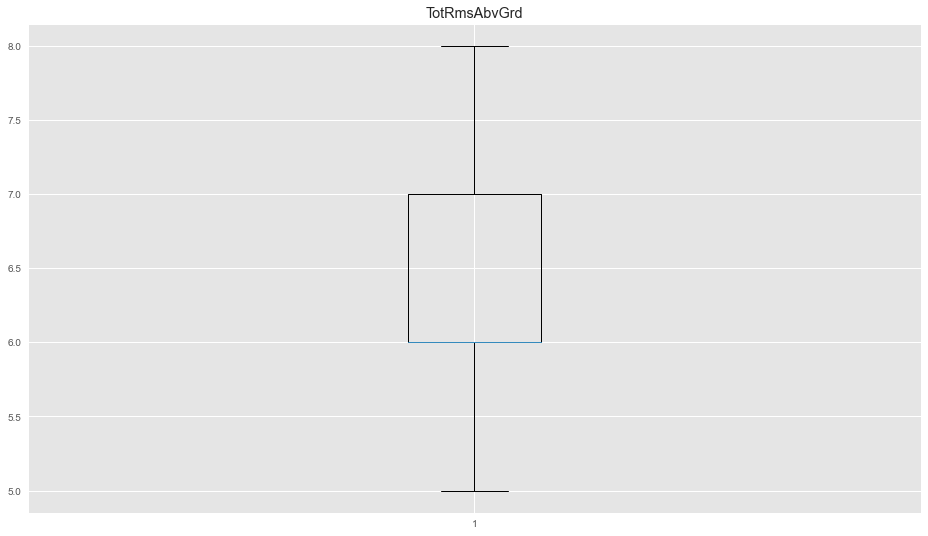

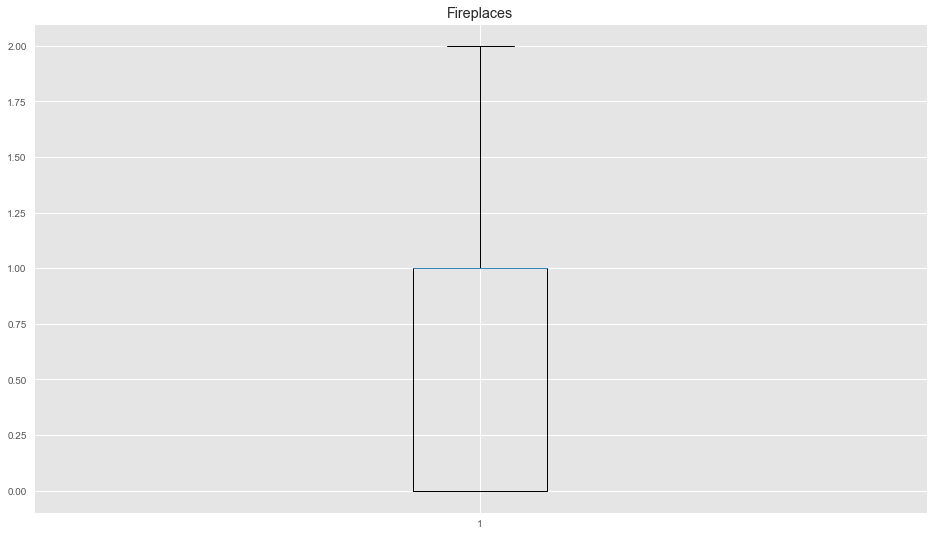

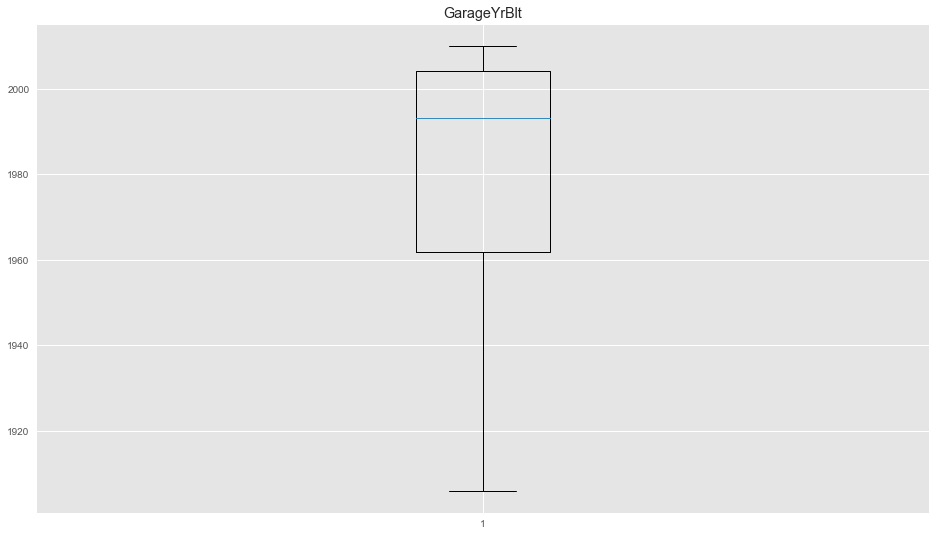

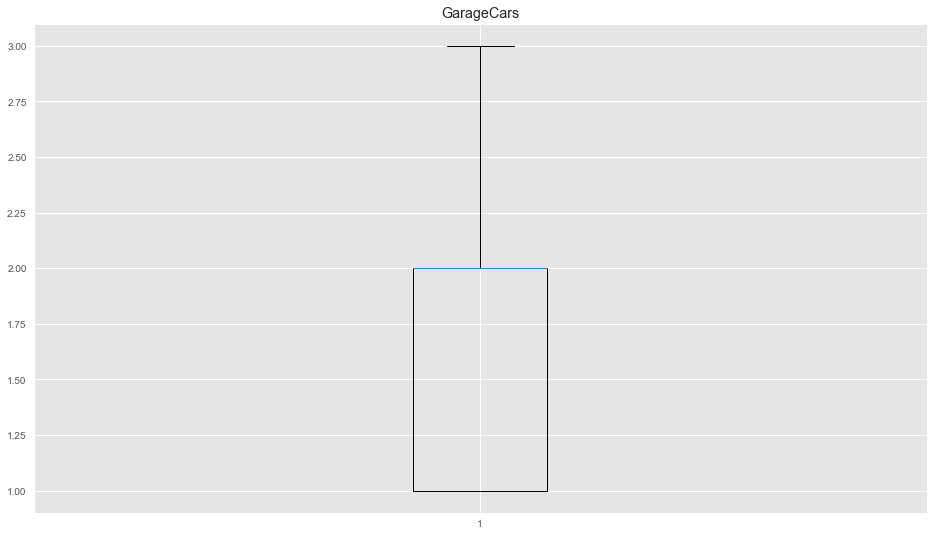

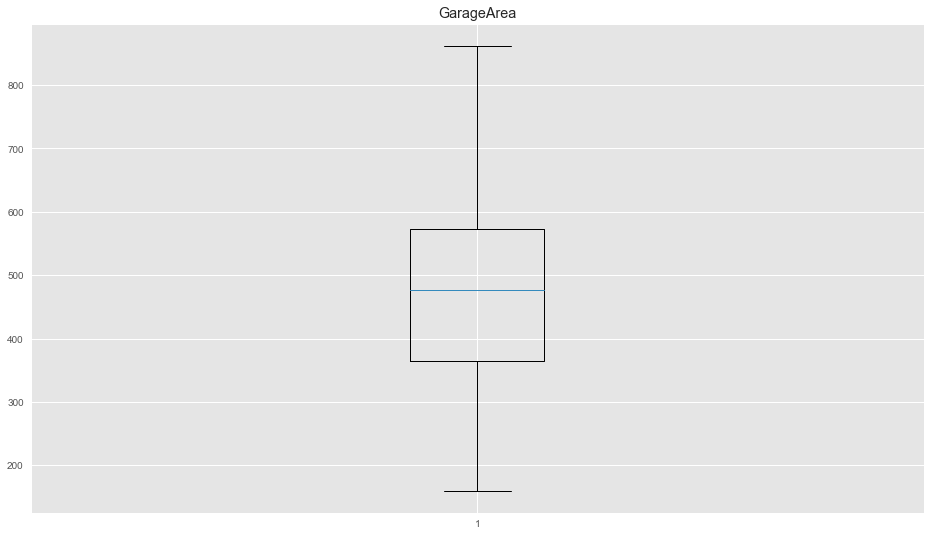

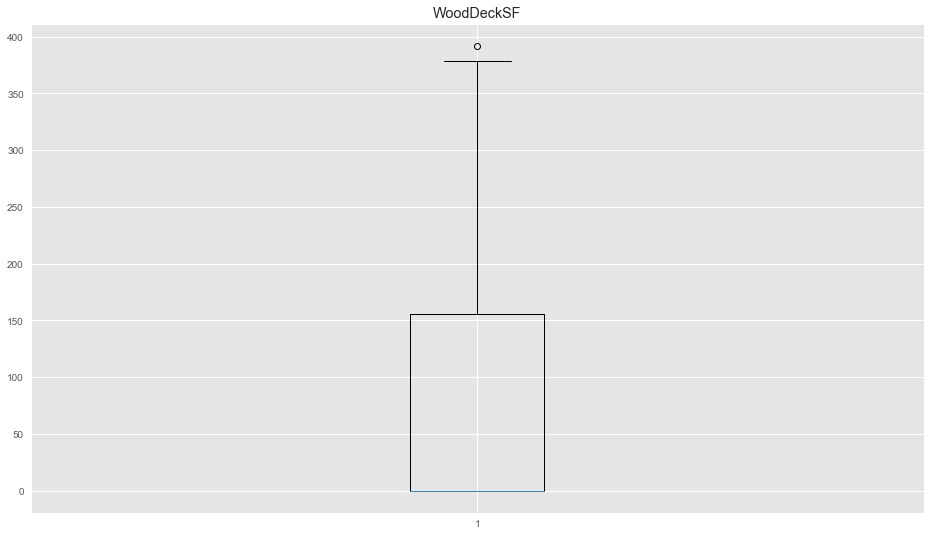

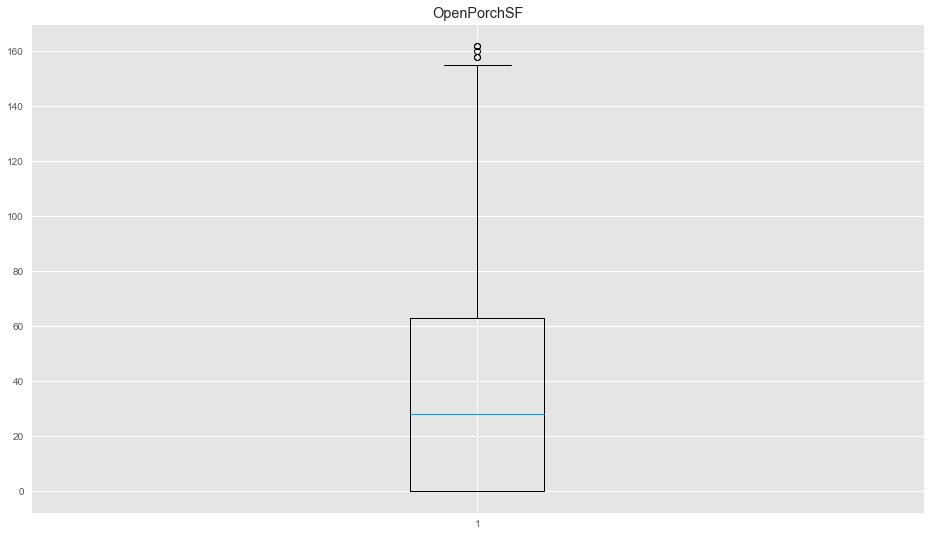

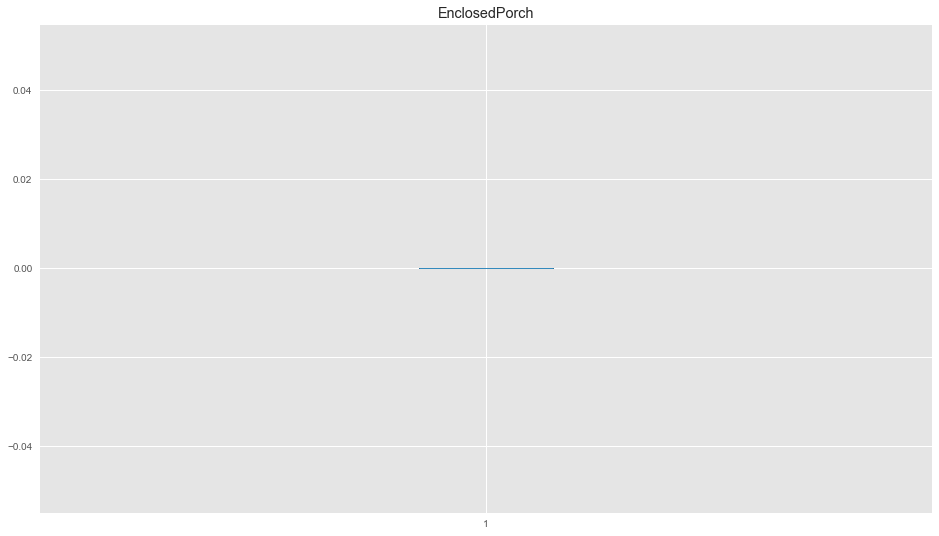

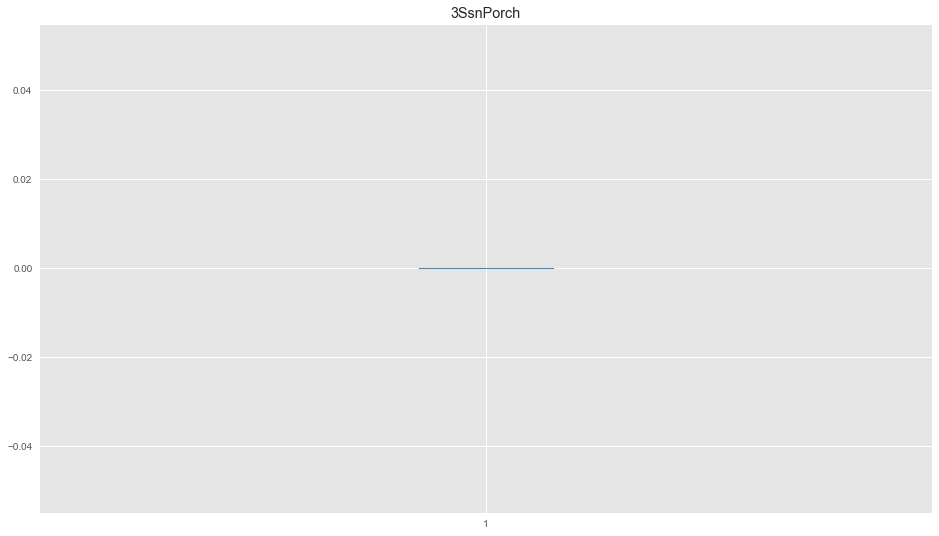

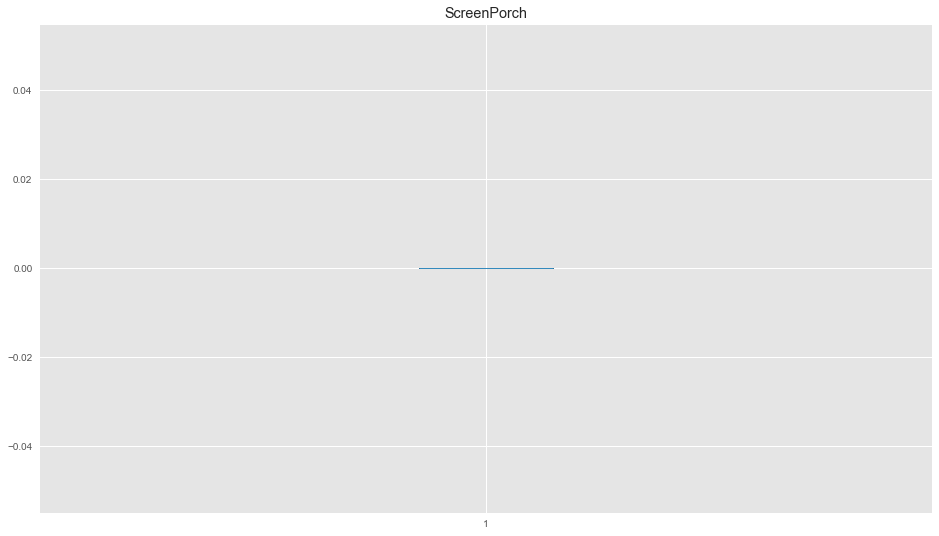

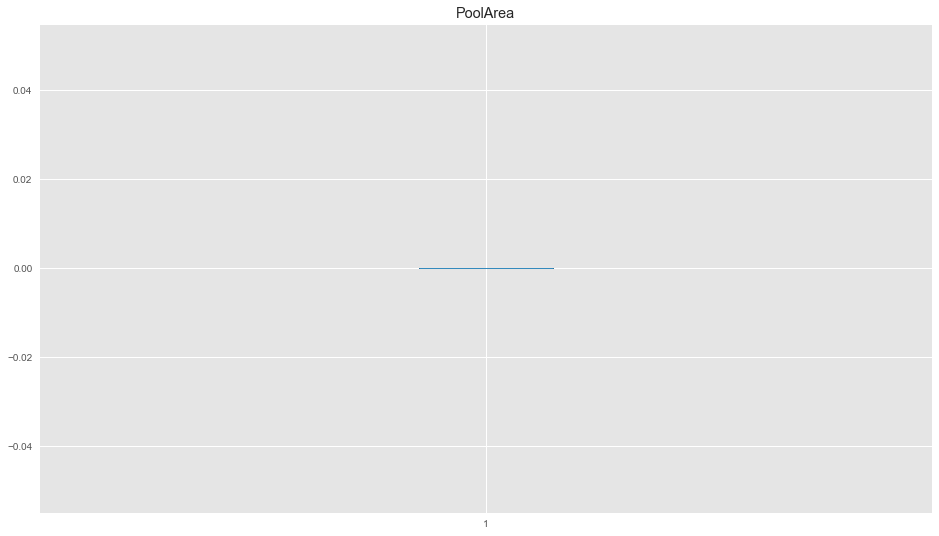

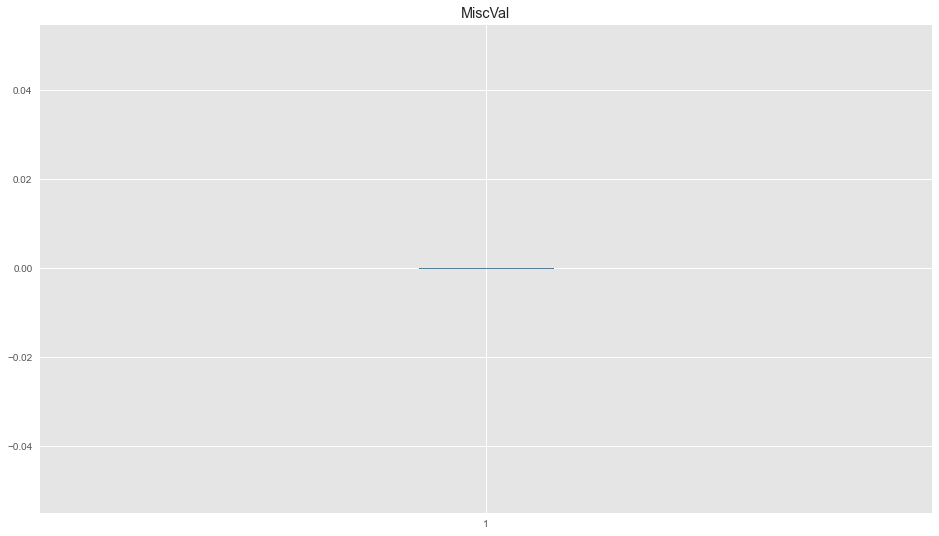

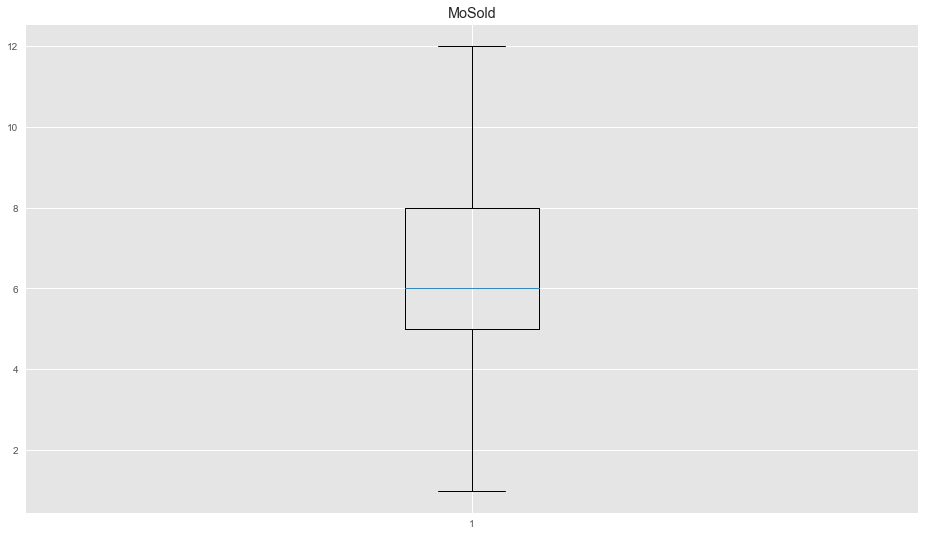

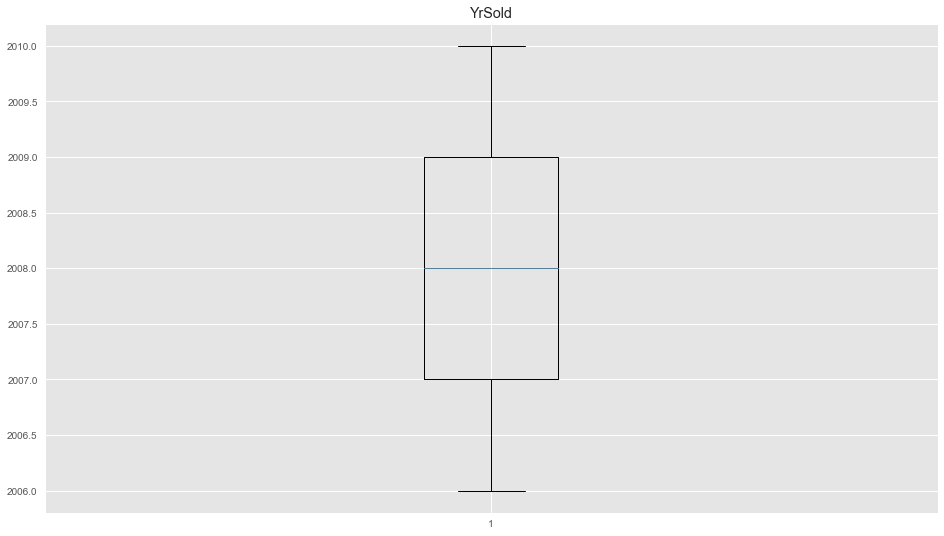

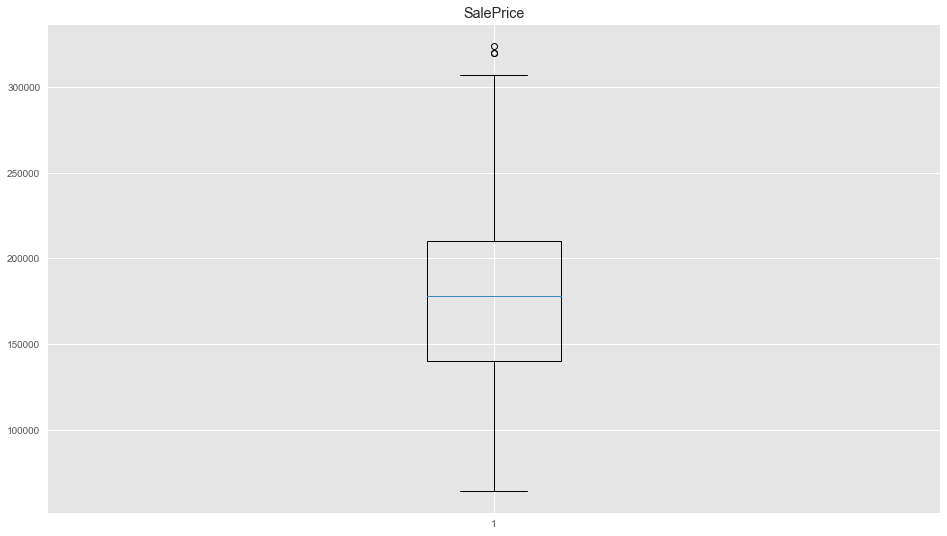

In [10]:
for columna in columns:
    Q1 = entrenamiento[columna].quantile(0.25)
    Q3 = entrenamiento[columna].quantile(0.75)
    IQR = Q3 - Q1

    indexes = entrenamiento[entrenamiento[columna] < (Q1 - 1.5 * IQR)].index
    entrenamiento.drop(indexes, inplace=True)

    indexes = entrenamiento[entrenamiento[columna] > (Q3 + 1.5 * IQR)].index
    entrenamiento.drop(indexes, inplace=True)
    
    plt.boxplot(entrenamiento[columna])
    plt.title(columna)
    plt.show()

### Muestra Representativa de los Datos

In [11]:
sample = entrenamiento.copy()

sample["combined"] = list(
    zip(
        sample["MSSubClass"],
        sample["LotFrontage"],
        sample["LotArea"],
        sample["OverallQual"],
        sample["OverallCond"],
        sample["YearBuilt"],
        sample["YearRemodAdd"],
        sample["MasVnrArea"],
        sample["BsmtFinSF1"],
        sample["BsmtFinSF2"],
        sample["BsmtUnfSF"],
        sample["TotalBsmtSF"],
        sample["1stFlrSF"],
        sample["2ndFlrSF"],
        sample["LowQualFinSF"],
        sample["GrLivArea"],
        sample["BsmtFullBath"],
        sample["BsmtHalfBath"],
        sample["FullBath"],
        sample["HalfBath"],
        sample["BedroomAbvGr"],
        sample["KitchenAbvGr"],
        sample["TotRmsAbvGrd"],
        sample["Fireplaces"],
        sample["GarageYrBlt"],
        sample["GarageCars"],
        sample["GarageArea"],
        sample["WoodDeckSF"],
        sample["OpenPorchSF"],
        sample["EnclosedPorch"],
        sample["3SsnPorch"],
        sample["ScreenPorch"],
        sample["PoolArea"],
        sample["MiscVal"],
        sample["MoSold"],
        sample["YrSold"],
        sample["SalePrice"]
    )
)

combined_weight = sample['combined'].value_counts(normalize=True)

sample['combined_weight'] = sample['combined'].apply(lambda x: combined_weight[x])

sample = sample.sample(65, weights=sample['combined_weight'])
sample = sample.drop(["combined_weight"], axis=1)

sample.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0,...,65.000000,65.000000,65.0,65.0,65.0,65.0,65.0,65.000000,65.000000,65.000000
mean,39.923077,69.707692,9459.200000,5.753846,5.538462,1976.323077,1985.938462,46.261538,404.523077,0.0,...,82.661538,34.184615,0.0,0.0,0.0,0.0,0.0,6.184615,2007.907692,164965.323077
std,28.263441,13.005676,2133.467367,1.186259,0.730516,28.391299,22.092757,85.562893,399.269963,0.0,...,93.310683,39.597543,0.0,0.0,0.0,0.0,0.0,2.567174,1.331389,50835.797608
min,20.000000,40.000000,4045.000000,4.000000,5.000000,1910.000000,1950.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,64500.000000
25%,20.000000,60.000000,8176.000000,5.000000,5.000000,1957.000000,1963.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129500.000000
50%,20.000000,70.000000,9084.000000,5.000000,5.000000,1975.000000,1998.000000,0.000000,340.000000,0.0,...,26.000000,24.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,152000.000000
75%,60.000000,78.000000,10930.000000,7.000000,6.000000,2004.000000,2005.000000,89.000000,763.000000,0.0,...,168.000000,48.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,196500.000000
max,120.000000,100.000000,13710.000000,8.000000,7.000000,2009.000000,2010.000000,336.000000,1300.000000,0.0,...,289.000000,140.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,297000.000000


### Correlacion de variables

#### Original

<AxesSubplot:>

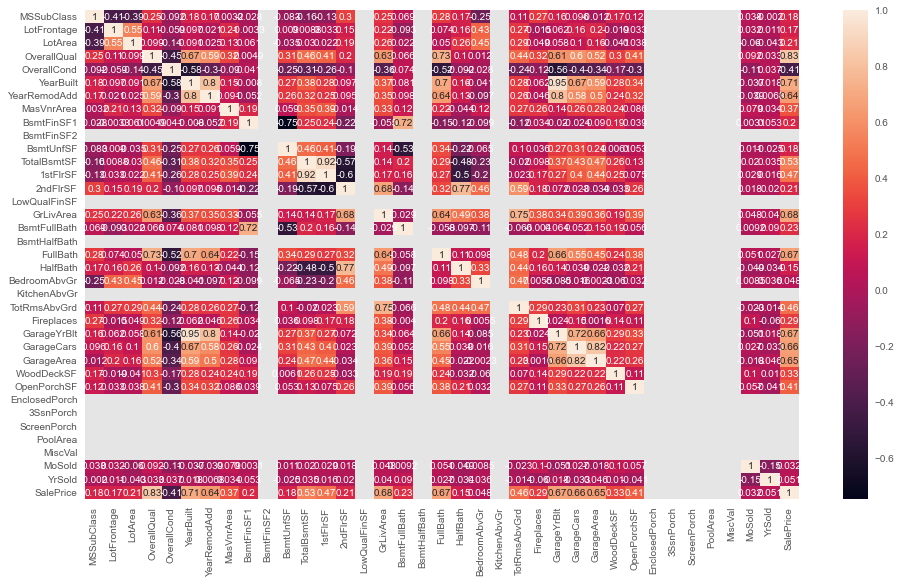

In [12]:
correlacion = entrenamiento.corr()
fig, axis = plt.subplots()
sb.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True, ax=axis)

#### Muestra

<AxesSubplot:>

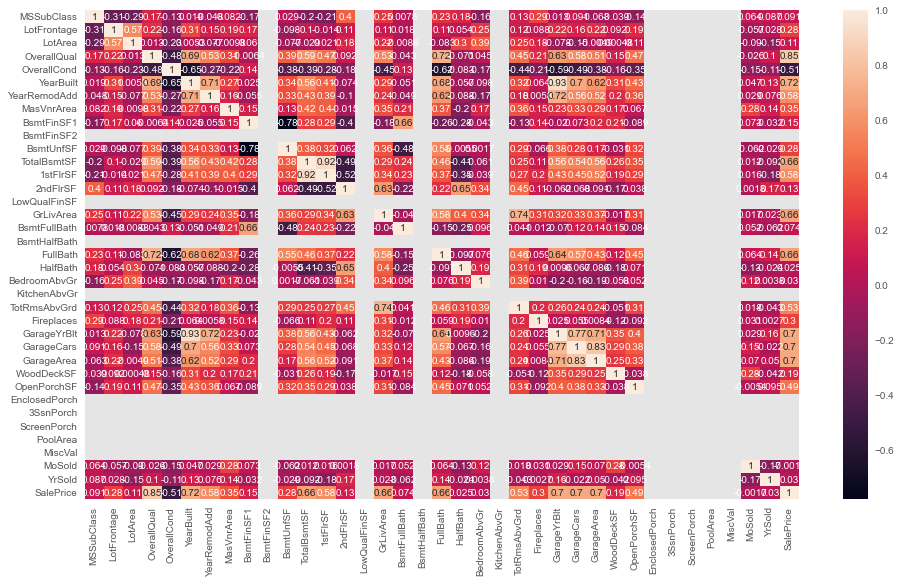

In [13]:
correlacion = sample.corr()
fig, axis = plt.subplots()
sb.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True, ax=axis)

### Clustering

#### Evaluación de posibles agrupamientos con Estadístico de Hopkings y VAT

##### SalePrice, OverallQual

In [18]:
sale_overall = entrenamiento[["SalePrice", "OverallQual"]]

pyclustertend.hopkins(sale_overall,len(sale_overall))

0.2472077502526166

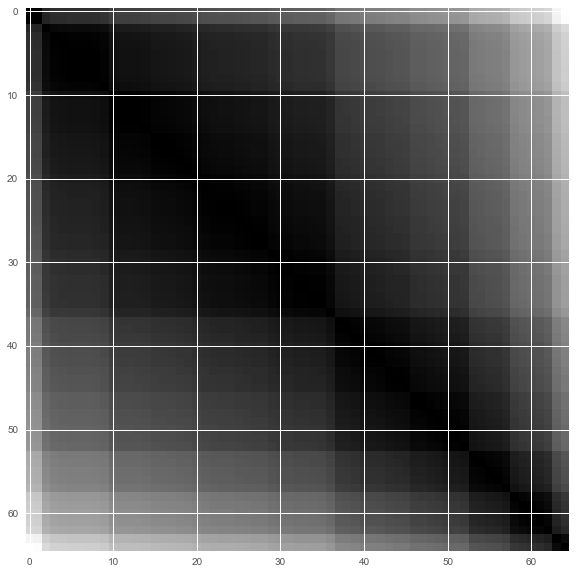

In [19]:
sale_overall = sample[["SalePrice", "OverallQual"]]
pyclustertend.vat(sale_overall)

##### SalePrice, YearBuilt

In [17]:
sale_year = entrenamiento[["SalePrice", "YearBuilt"]]

pyclustertend.hopkins(sale_year,len(sale_year))

0.2933233810606193

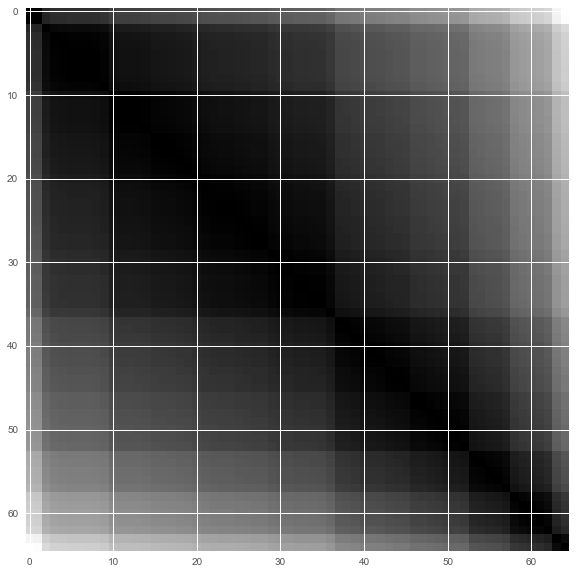

In [46]:
sale_year = sample[["SalePrice", "YearBuilt"]]

pyclustertend.vat(sale_year)

##### SalePrice, YearRemodAdd

In [21]:
sale_remod = entrenamiento[["SalePrice", "YearRemodAdd"]]

pyclustertend.hopkins(sale_remod,len(sale_remod))

0.2484675795468489

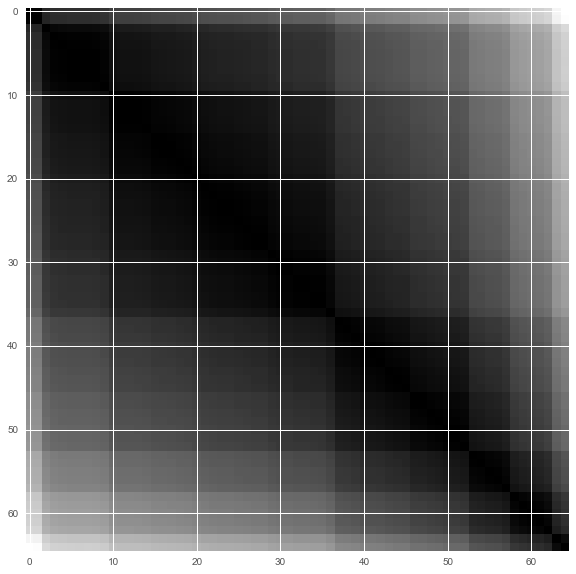

In [22]:
sale_remod = sample[["SalePrice", "YearRemodAdd"]]

pyclustertend.vat(sale_remod)

##### SalePrice, TotalBsmtSF

In [23]:
sale_totalbsmt = entrenamiento[["SalePrice", "TotalBsmtSF"]]

pyclustertend.hopkins(sale_totalbsmt,len(sale_totalbsmt))

0.29889960384907605

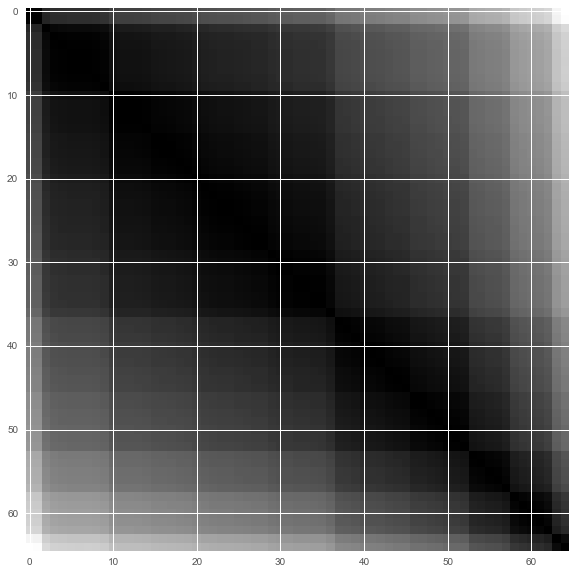

In [24]:
sale_totalbsmt = sample[["SalePrice", "TotalBsmtSF"]]

pyclustertend.vat(sale_totalbsmt)

##### SalePrice, 1stFlrSF

In [25]:
sale_1stflr = entrenamiento[["SalePrice", "1stFlrSF"]]

pyclustertend.hopkins(sale_1stflr,len(sale_1stflr))

0.2895321912761264

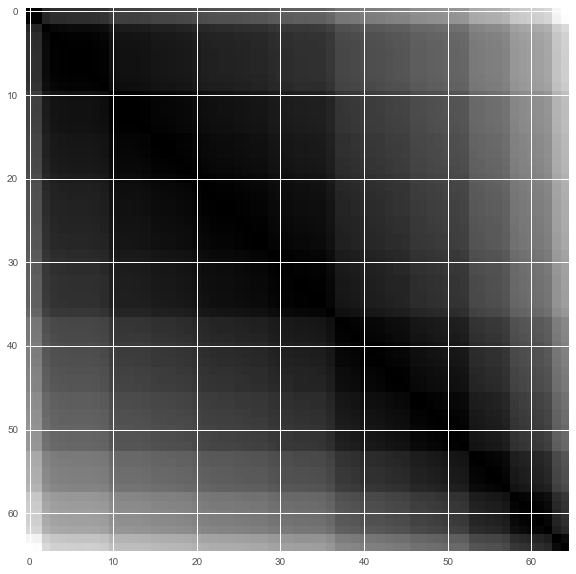

In [28]:
sale_1stflr = sample[["SalePrice", "1stFlrSF"]]

pyclustertend.vat(sale_1stflr)

##### SalePrice, GrLiveArea

In [32]:
sale_grlive = entrenamiento[["SalePrice", "GrLivArea"]]

pyclustertend.hopkins(sale_grlive,len(sale_grlive))

0.26844122233443135

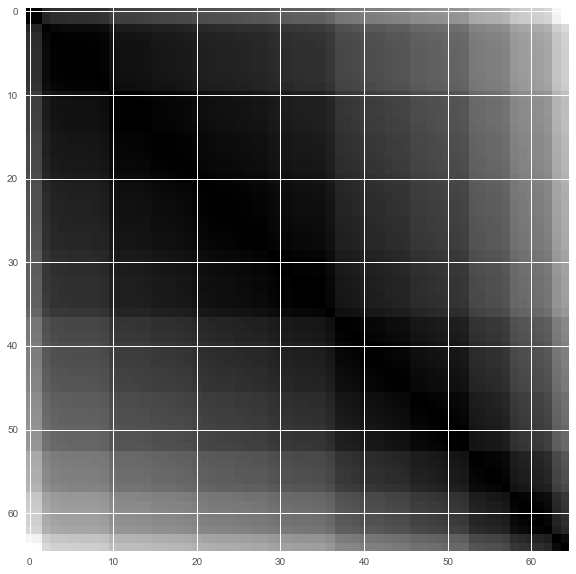

In [33]:
sale_grlive = sample[["SalePrice", "GrLivArea"]]

pyclustertend.vat(sale_grlive)

##### SalePrice, FullBath

In [35]:
sale_fullbath = entrenamiento[["SalePrice", "FullBath"]]

pyclustertend.hopkins(sale_fullbath,len(sale_fullbath))

0.25765853135248074

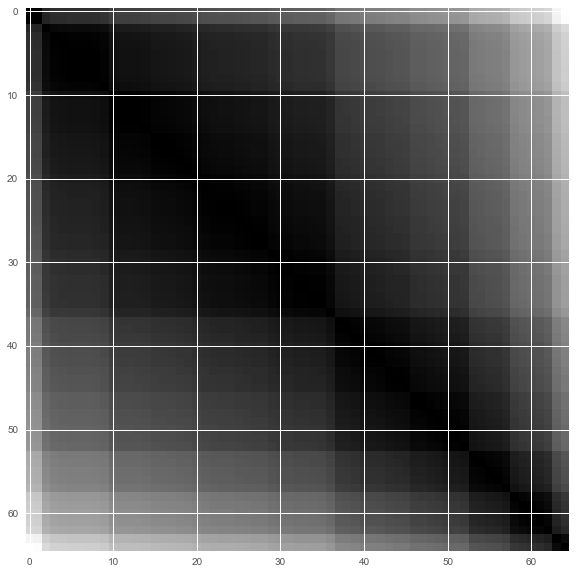

In [40]:
sale_fullbath = sample[["SalePrice", "FullBath"]]

pyclustertend.vat(sale_fullbath)

##### SalePrice, GarageYrBlt

In [37]:
sale_garage = entrenamiento[["SalePrice", "GarageYrBlt"]]

pyclustertend.hopkins(sale_garage,len(sale_garage))

0.2421771609876748

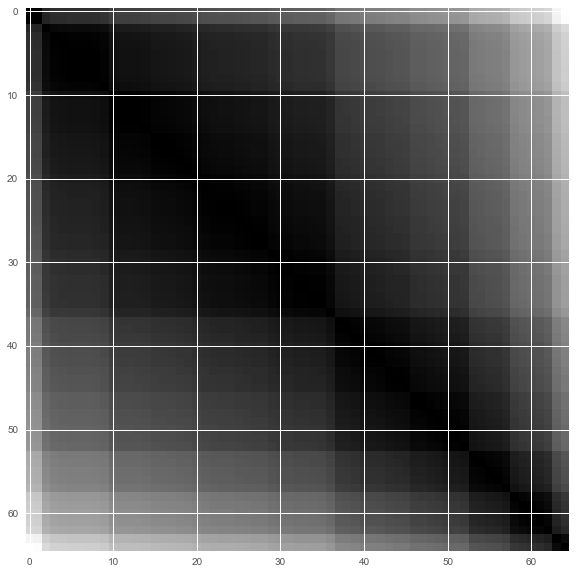

In [41]:
sale_garage = sample[["SalePrice", "GarageYrBlt"]]

pyclustertend.vat(sale_garage)

##### SalePrice, GarageCars

In [38]:
sale_garagecars = entrenamiento[["SalePrice", "GarageCars"]]

pyclustertend.hopkins(sale_garagecars,len(sale_garagecars))

0.2454496175941083

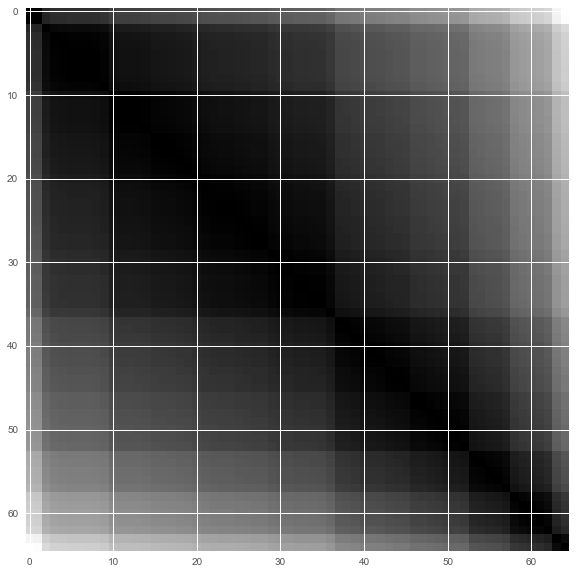

In [42]:
sale_garagecars = sample[["SalePrice", "GarageCars"]]

pyclustertend.vat(sale_garagecars)

##### SalePrice, GarageArea

In [39]:
sale_garagearea = entrenamiento[["SalePrice", "GarageArea"]]

pyclustertend.hopkins(sale_garagearea,len(sale_garagearea))

0.2614445139908783

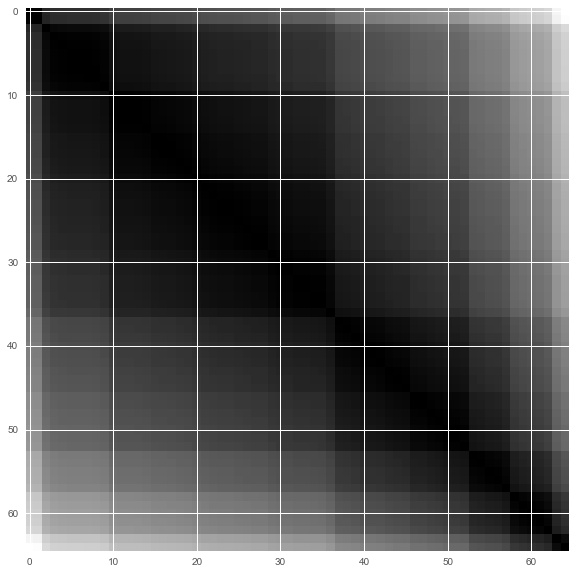

In [43]:
sale_garagearea = sample[["SalePrice", "GarageArea"]]

pyclustertend.vat(sale_garagearea)

### Determinacion de grupos, por medio de graficas de codos

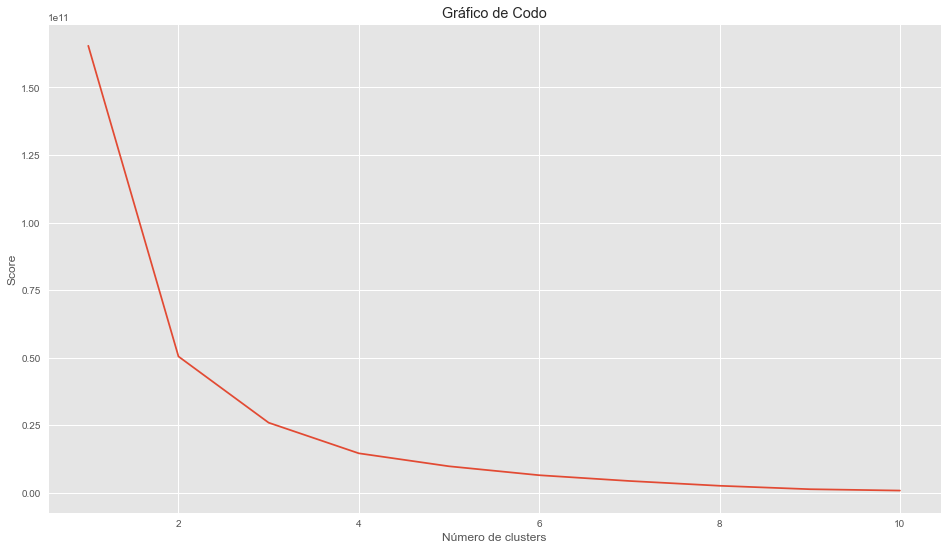

Numero indicado de clusters: 3


In [45]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(sale_overall)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

print('Numero indicado de clusters: 3')

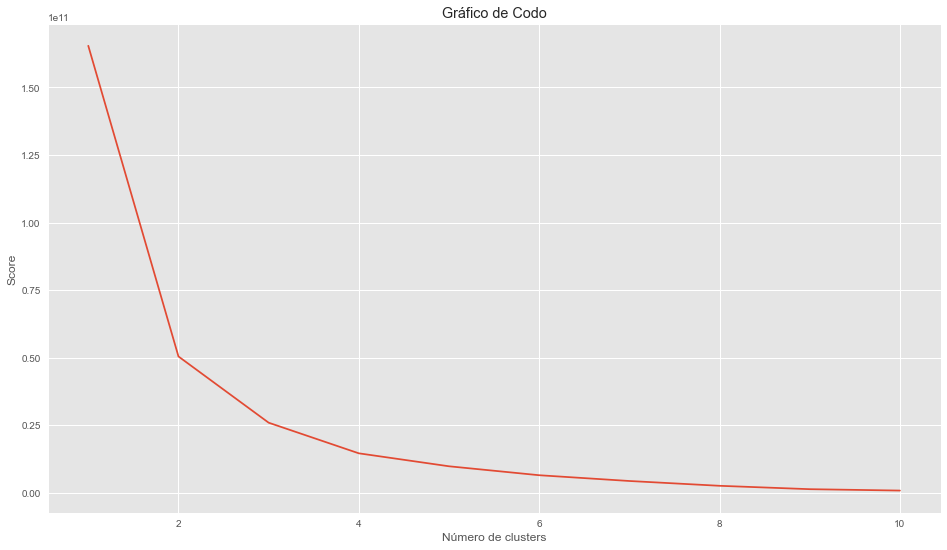

Numero indicado de clusters: 3


In [47]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(sale_year)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

print('Numero indicado de clusters: 3')

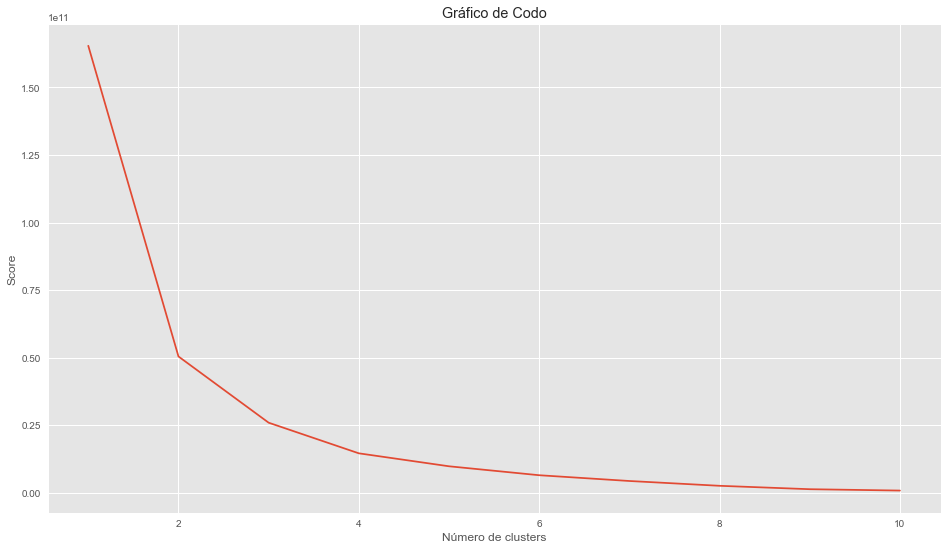

Numero indicado de clusters: 3


In [48]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(sale_remod)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

print('Numero indicado de clusters: 3')

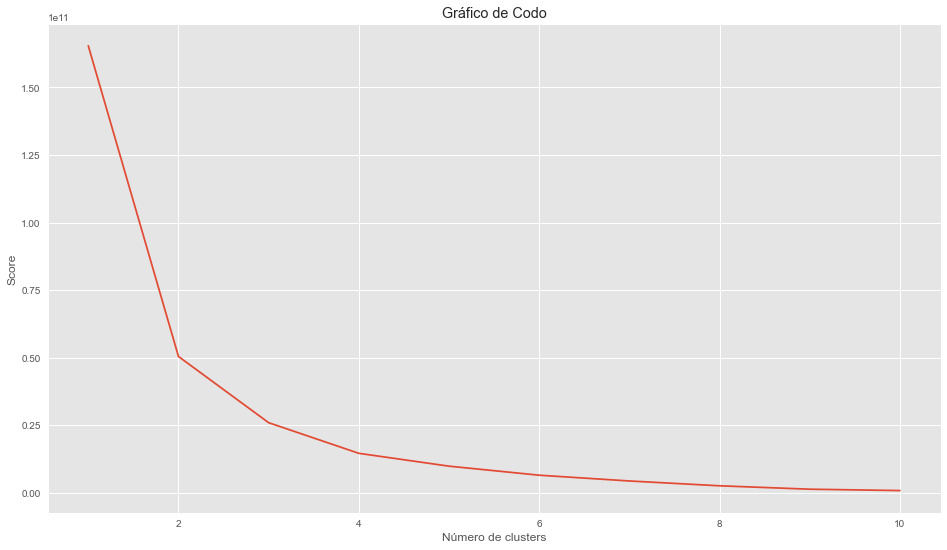

Numero indicado de clusters: 3


In [49]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(sale_totalbsmt)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

print('Numero indicado de clusters: 3')

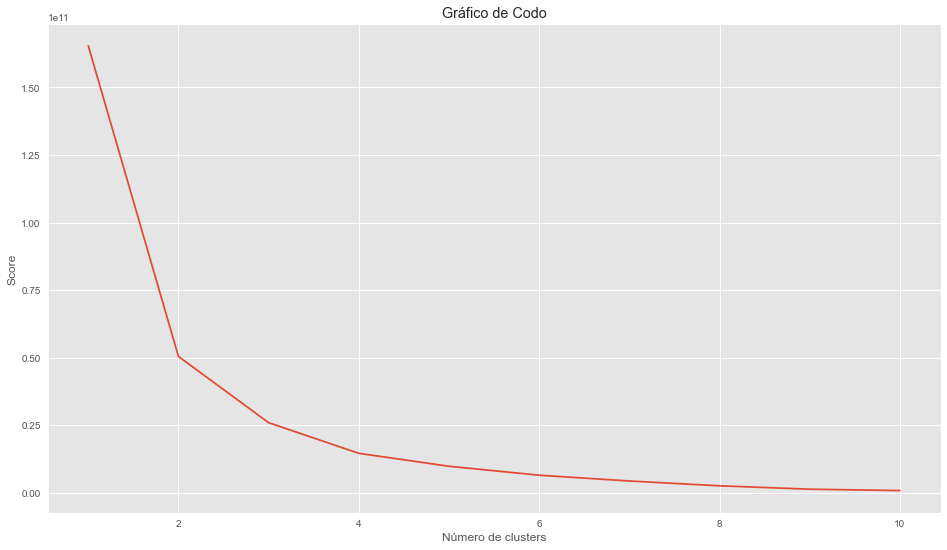

Numero indicado de clusters: 3


In [50]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(sale_1stflr)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

print('Numero indicado de clusters: 3')

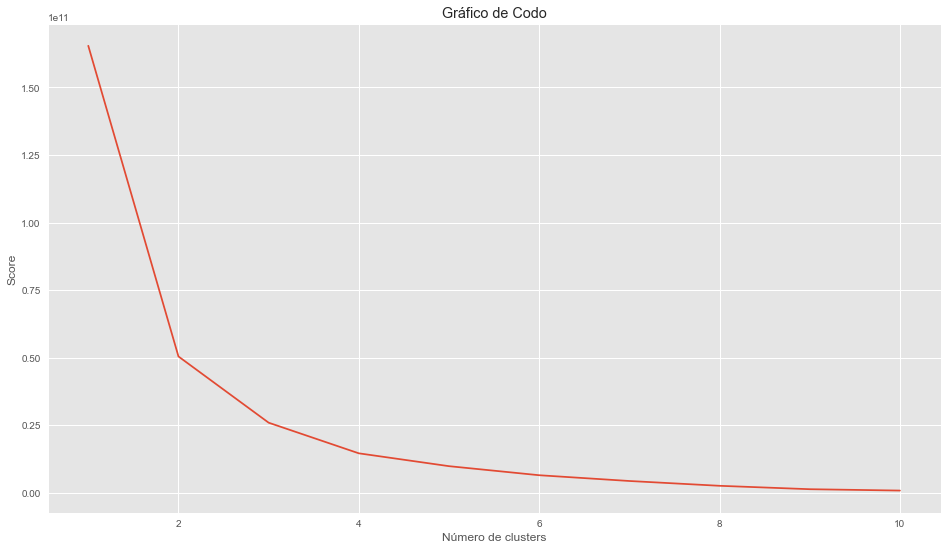

Numero indicado de clusters: 3


In [51]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(sale_grlive)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

print('Numero indicado de clusters: 3')

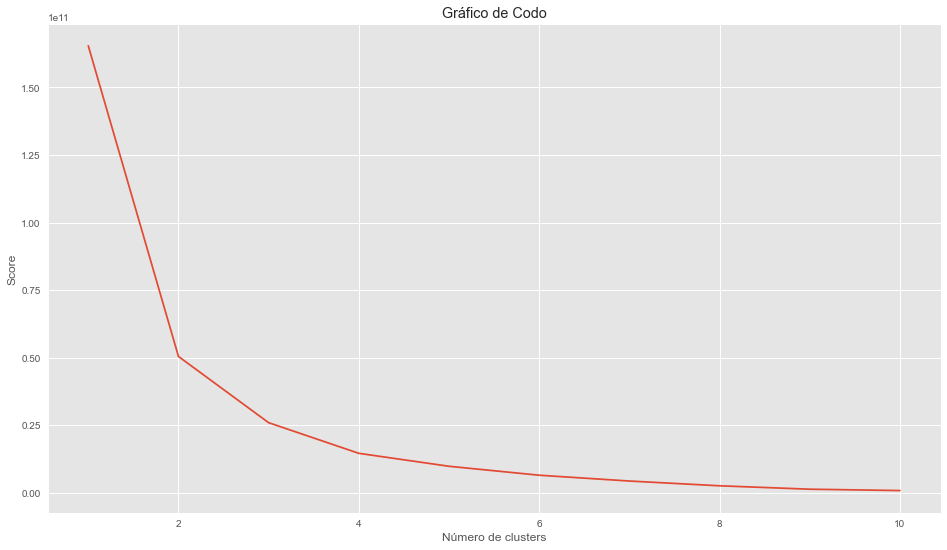

Numero indicado de clusters: 3


In [52]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(sale_fullbath)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

print('Numero indicado de clusters: 3')

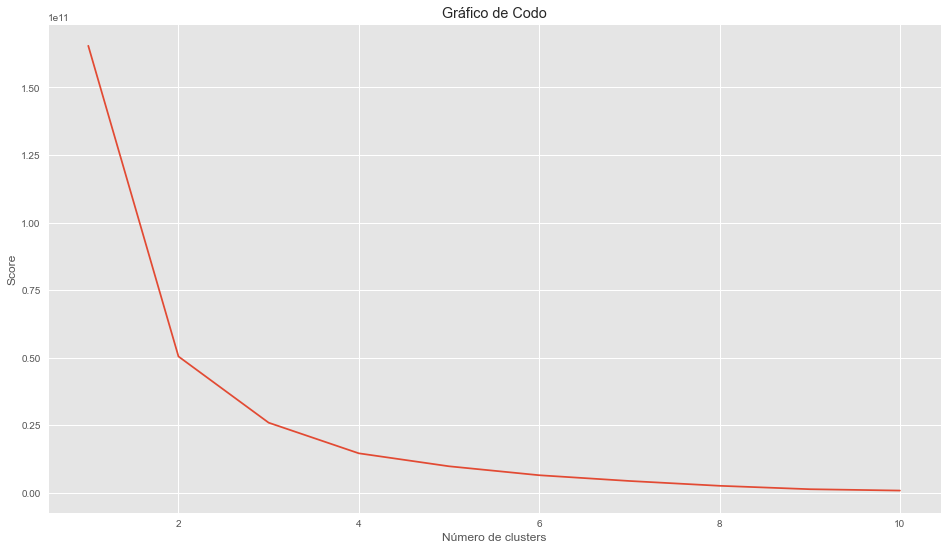

Numero indicado de clusters: 3


In [53]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(sale_garage)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

print('Numero indicado de clusters: 3')

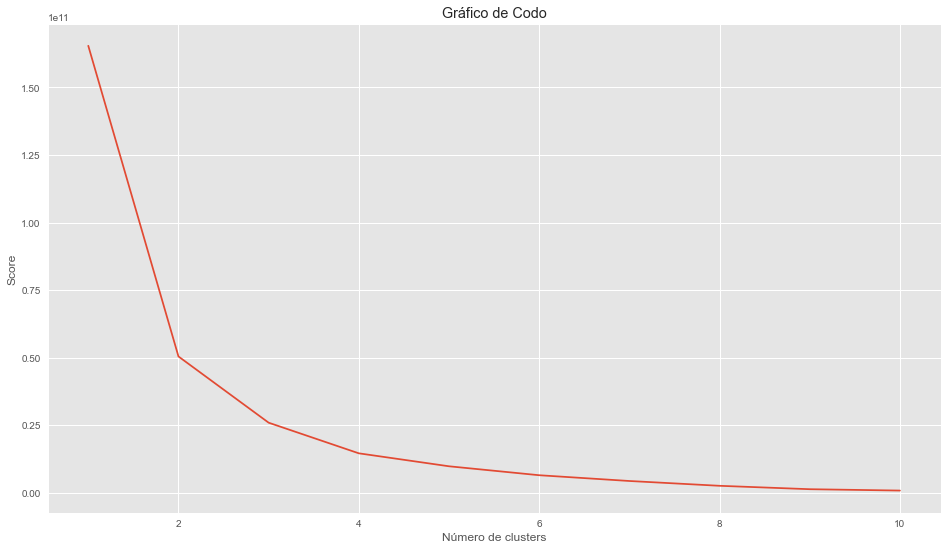

Numero indicado de clusters: 3


In [54]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(sale_garagecars)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

print('Numero indicado de clusters: 3')

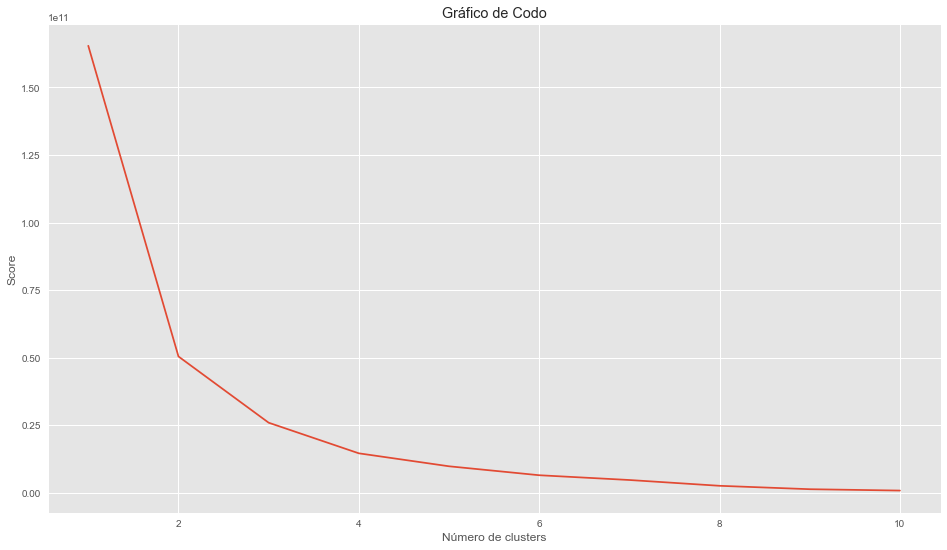

Numero indicado de clusters: 3


In [55]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(sale_garagearea)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

print('Numero indicado de clusters: 3')

### Algoritmo K-Medias

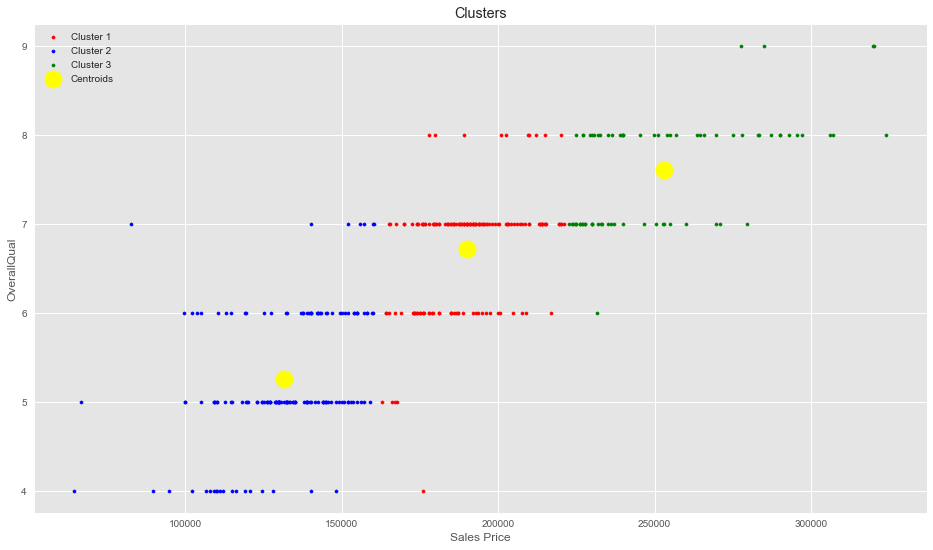

In [67]:
kmeans = cluster.KMeans(n_clusters = 3)
X = entrenamiento.iloc[:, [36, 3]].values
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.ylabel('OverallQual')
plt.xlabel('Sales Price')
plt.legend()
plt.show()

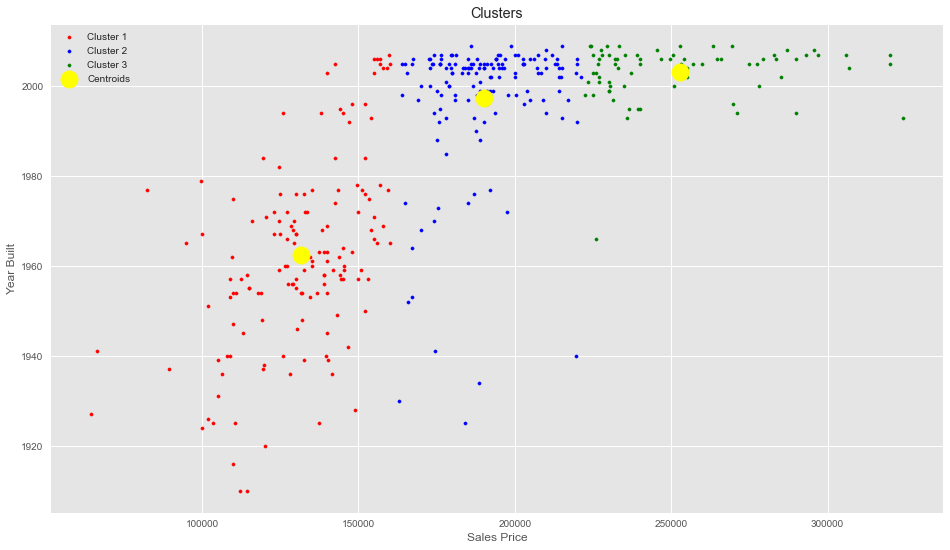

In [68]:
kmeans = cluster.KMeans(n_clusters = 3)
X = entrenamiento.iloc[:, [36, 5]].values
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.ylabel('Year Built')
plt.xlabel('Sales Price')
plt.legend()
plt.show()

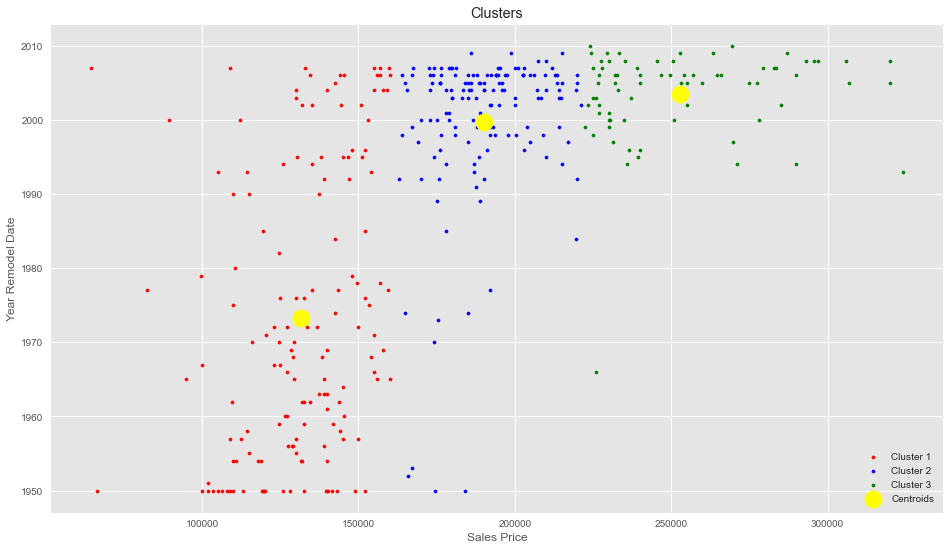

In [70]:
kmeans = cluster.KMeans(n_clusters = 3)
X = entrenamiento.iloc[:, [36, 6]].values
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.ylabel('Year Remodel Date')
plt.xlabel('Sales Price')
plt.legend()
plt.show()

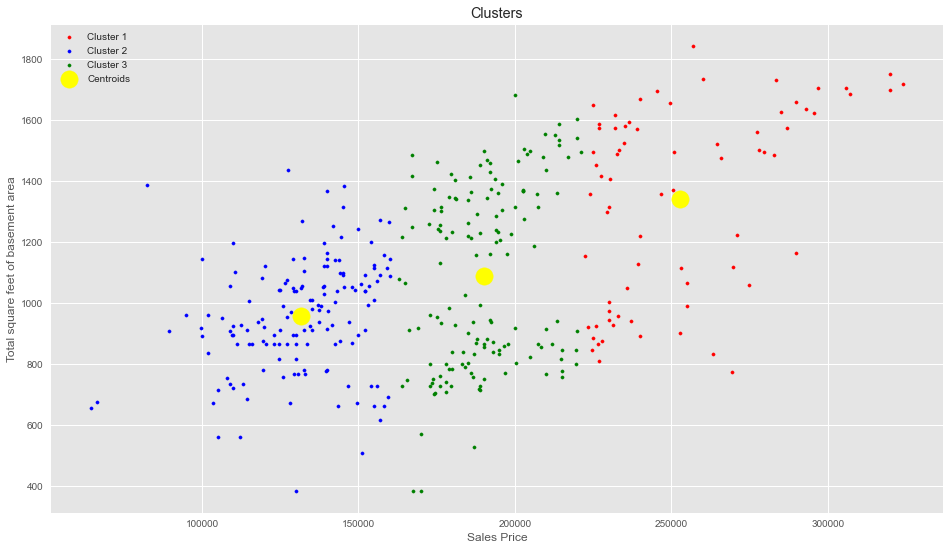

In [71]:
kmeans = cluster.KMeans(n_clusters = 3)
X = entrenamiento.iloc[:, [36, 11]].values
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.ylabel('Total square feet of basement area')
plt.xlabel('Sales Price')
plt.legend()
plt.show()

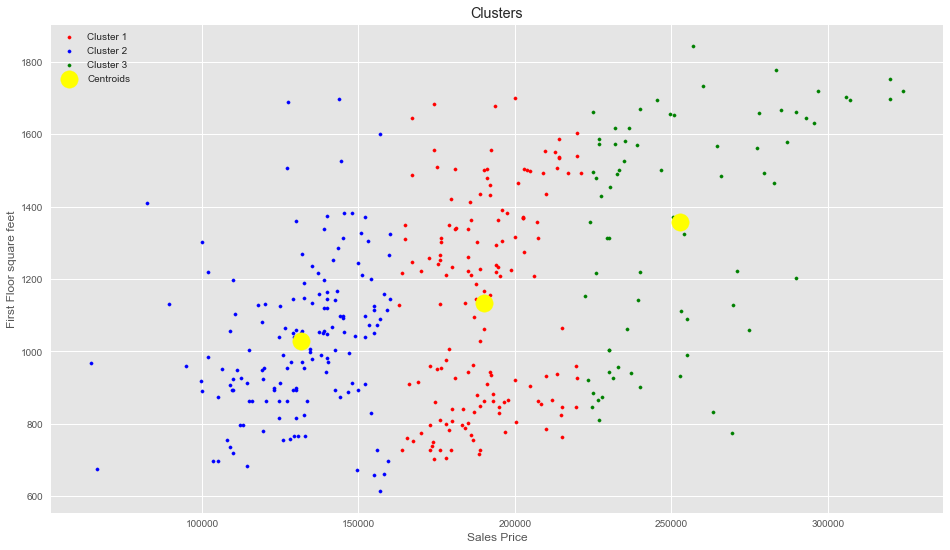

In [72]:
kmeans = cluster.KMeans(n_clusters = 3)
X = entrenamiento.iloc[:, [36, 12]].values
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.ylabel('First Floor square feet')
plt.xlabel('Sales Price')
plt.legend()
plt.show()

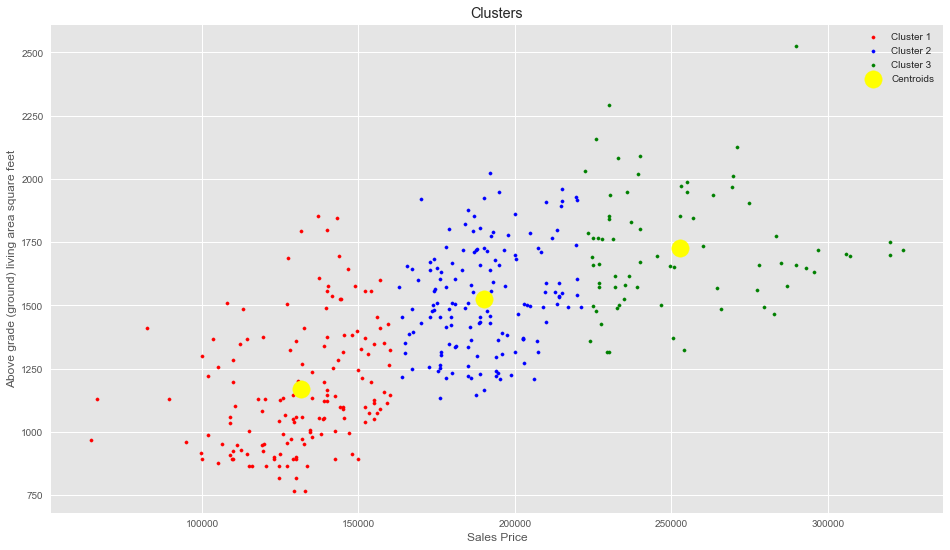

In [73]:
kmeans = cluster.KMeans(n_clusters = 3)
X = entrenamiento.iloc[:, [36, 15]].values
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.ylabel('Above grade (ground) living area square feet')
plt.xlabel('Sales Price')
plt.legend()
plt.show()

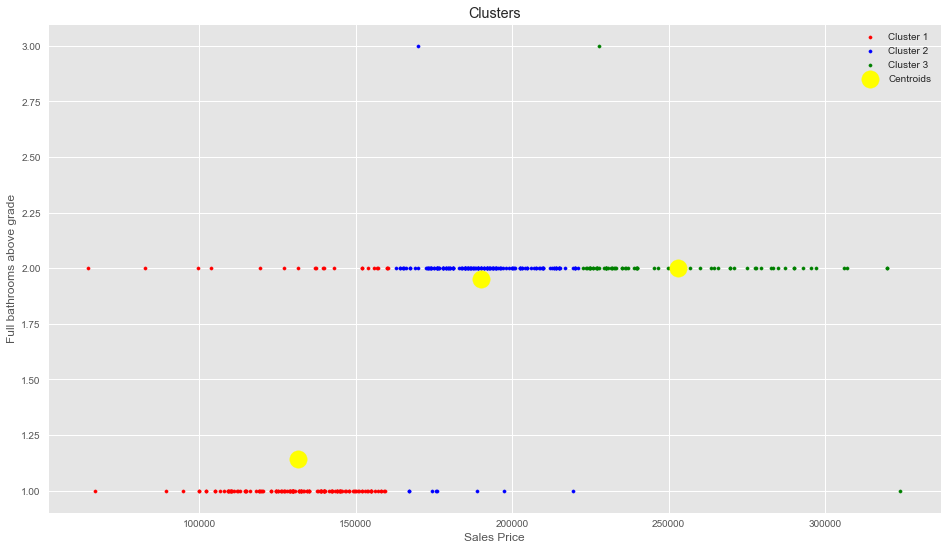

In [74]:
kmeans = cluster.KMeans(n_clusters = 3)
X = entrenamiento.iloc[:, [36, 18]].values
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.ylabel('Full bathrooms above grade')
plt.xlabel('Sales Price')
plt.legend()
plt.show()

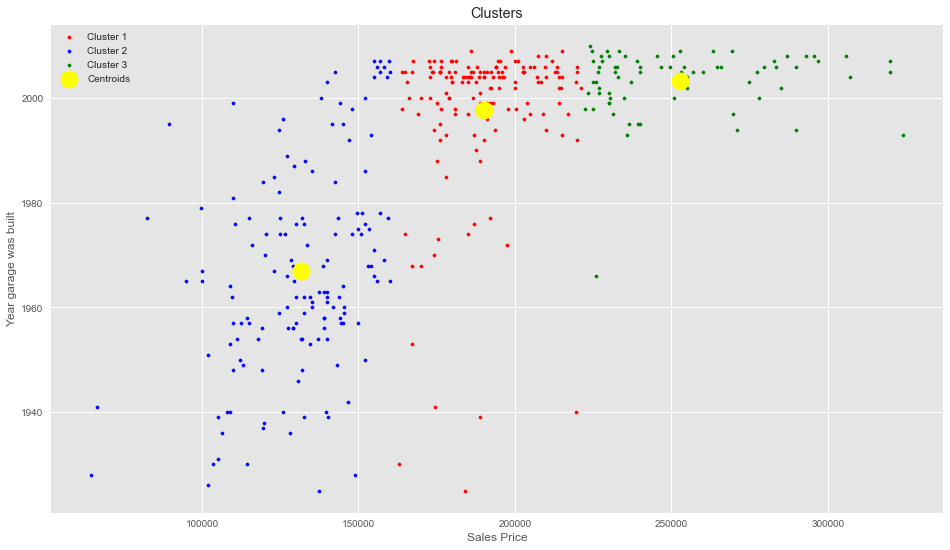

In [75]:
kmeans = cluster.KMeans(n_clusters = 3)
X = entrenamiento.iloc[:, [36, 24]].values
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.ylabel('Year garage was built')
plt.xlabel('Sales Price')
plt.legend()
plt.show()

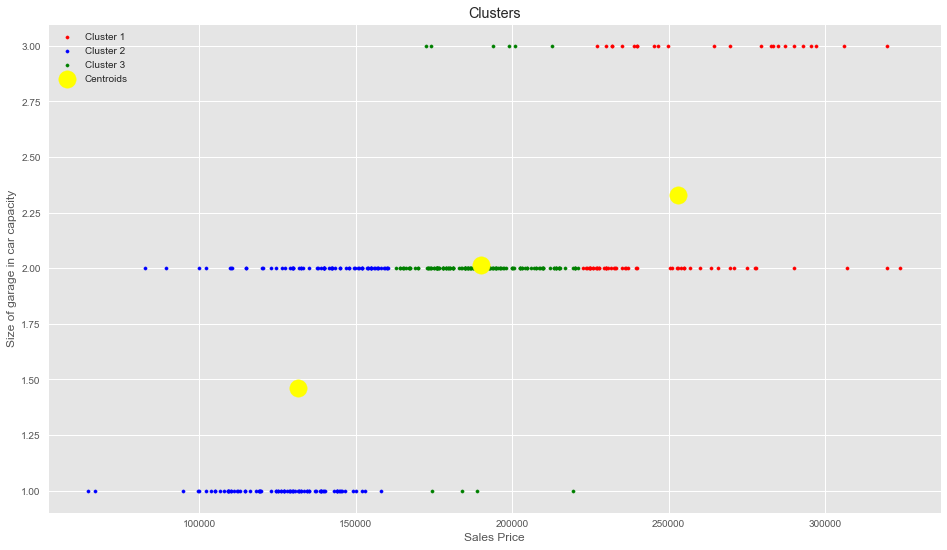

In [76]:
kmeans = cluster.KMeans(n_clusters = 3)
X = entrenamiento.iloc[:, [36, 25]].values
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.ylabel('Size of garage in car capacity')
plt.xlabel('Sales Price')
plt.legend()
plt.show()

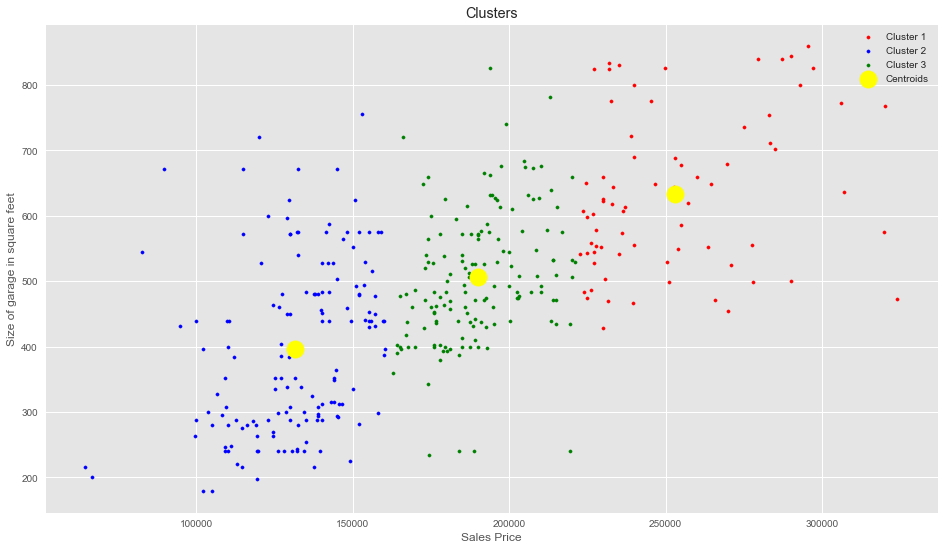

In [77]:
kmeans = cluster.KMeans(n_clusters = 3)
X = entrenamiento.iloc[:, [36, 26]].values
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.ylabel('Size of garage in square feet')
plt.xlabel('Sales Price')
plt.legend()
plt.show()

In [6]:
kmeans = cluster.KMeans(n_clusters = 3)
X = np.array(entrenamiento[["SalePrice", "OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "GarageYrBlt", "GarageCars", "GarageArea"]])
X = sklearn.preprocessing.scale(X)
kmeans.fit(X)
entrenamiento['KmeansCluster'] = kmeans.labels_

In [46]:
entrenamiento['Quality-Price'] = entrenamiento['OverallQual'] / entrenamiento['SalePrice']
entrenamiento['Quality-Price'] = entrenamiento['Quality-Price'] / max(entrenamiento['Quality-Price'])
entrenamiento

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Quality-Price
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,61,0,0,0,0,0,2,2008,208500,0.335731
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,5,2007,181500,0.330579
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,42,0,0,0,0,0,9,2008,223500,0.313199
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,35,272,0,0,0,0,2,2006,140000,0.500000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,84,0,0,0,0,0,12,2008,250000,0.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,40,0,0,0,0,0,8,2007,175000,0.342857
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,0,0,2,2010,210000,0.285714
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,60,0,0,0,0,2500,5,2010,266500,0.262664
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,112,0,0,0,0,4,2010,142125,0.351803


In [64]:
l = 0
for col in entrenamiento.columns:
    print(col + "       " + str(l))
    l = l + 1

MSSubClass       0
LotFrontage       1
LotArea       2
OverallQual       3
OverallCond       4
YearBuilt       5
YearRemodAdd       6
MasVnrArea       7
BsmtFinSF1       8
BsmtFinSF2       9
BsmtUnfSF       10
TotalBsmtSF       11
1stFlrSF       12
2ndFlrSF       13
LowQualFinSF       14
GrLivArea       15
BsmtFullBath       16
BsmtHalfBath       17
FullBath       18
HalfBath       19
BedroomAbvGr       20
KitchenAbvGr       21
TotRmsAbvGrd       22
Fireplaces       23
GarageYrBlt       24
GarageCars       25
GarageArea       26
WoodDeckSF       27
OpenPorchSF       28
EnclosedPorch       29
3SsnPorch       30
ScreenPorch       31
PoolArea       32
MiscVal       33
MoSold       34
YrSold       35
SalePrice       36


6. Elabore  el  árbol  de  clasificación  utilizando  el  conjunto  de  entrenamiento  y  la  variable 
respuesta que creó en el punto 4.  Explique los resultados a los que llega. Muestre el modelo gráficamente. El experimento debe ser reproducible por lo que debe fijar que los conjuntos de entrenamiento y prueba sean los mismos siempre que se ejecute el código.

In [7]:
#Copiar los datos
arbolDF = entrenamiento.copy()
arbolDF = arbolDF[["SalePrice", "OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "GarageYrBlt", "GarageCars", "GarageArea", "KmeansCluster"]]
arbolDF

,SalePrice,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageYrBlt,GarageCars,GarageArea,KmeansCluster
0,208500,7,2003,2003,856,856,1710,2,2003.0,2,548,2
1,181500,6,1976,1976,1262,1262,1262,2,1976.0,2,460,2
2,223500,7,2001,2002,920,920,1786,2,2001.0,2,608,2
3,140000,7,1915,1970,756,961,1717,1,1998.0,3,642,0
4,250000,8,2000,2000,1145,1145,2198,2,2000.0,3,836,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1999,2000,953,953,1647,2,1999.0,2,460,2
1456,210000,6,1978,1988,1542,2073,2073,2,1978.0,2,500,2
1457,266500,7,1941,2006,1152,1188,2340,2,1941.0,1,252,2
1458,142125,5,1950,1996,1078,1078,1078,1,1950.0,1,240,0


In [8]:
from sklearn.model_selection import train_test_split

Y = arbolDF.pop("KmeansCluster")
X = arbolDF


#Dividiremos nuestros datos en dos gran conjuntos
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.75, random_state = 0)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 340 to 880
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     840 non-null    int64  
 1   OverallQual   840 non-null    int64  
 2   YearBuilt     840 non-null    int64  
 3   YearRemodAdd  840 non-null    int64  
 4   TotalBsmtSF   840 non-null    int64  
 5   1stFlrSF      840 non-null    int64  
 6   GrLivArea     840 non-null    int64  
 7   FullBath      840 non-null    int64  
 8   GarageYrBlt   840 non-null    float64
 9   GarageCars    840 non-null    int64  
 10  GarageArea    840 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 78.8 KB


In [56]:
from sklearn.tree import DecisionTreeClassifier

#Se crea el modelo de arbol que utilizaremos
arbol = DecisionTreeClassifier(max_depth = 4)

arbol_ventas = arbol.fit(x_train, y_train)

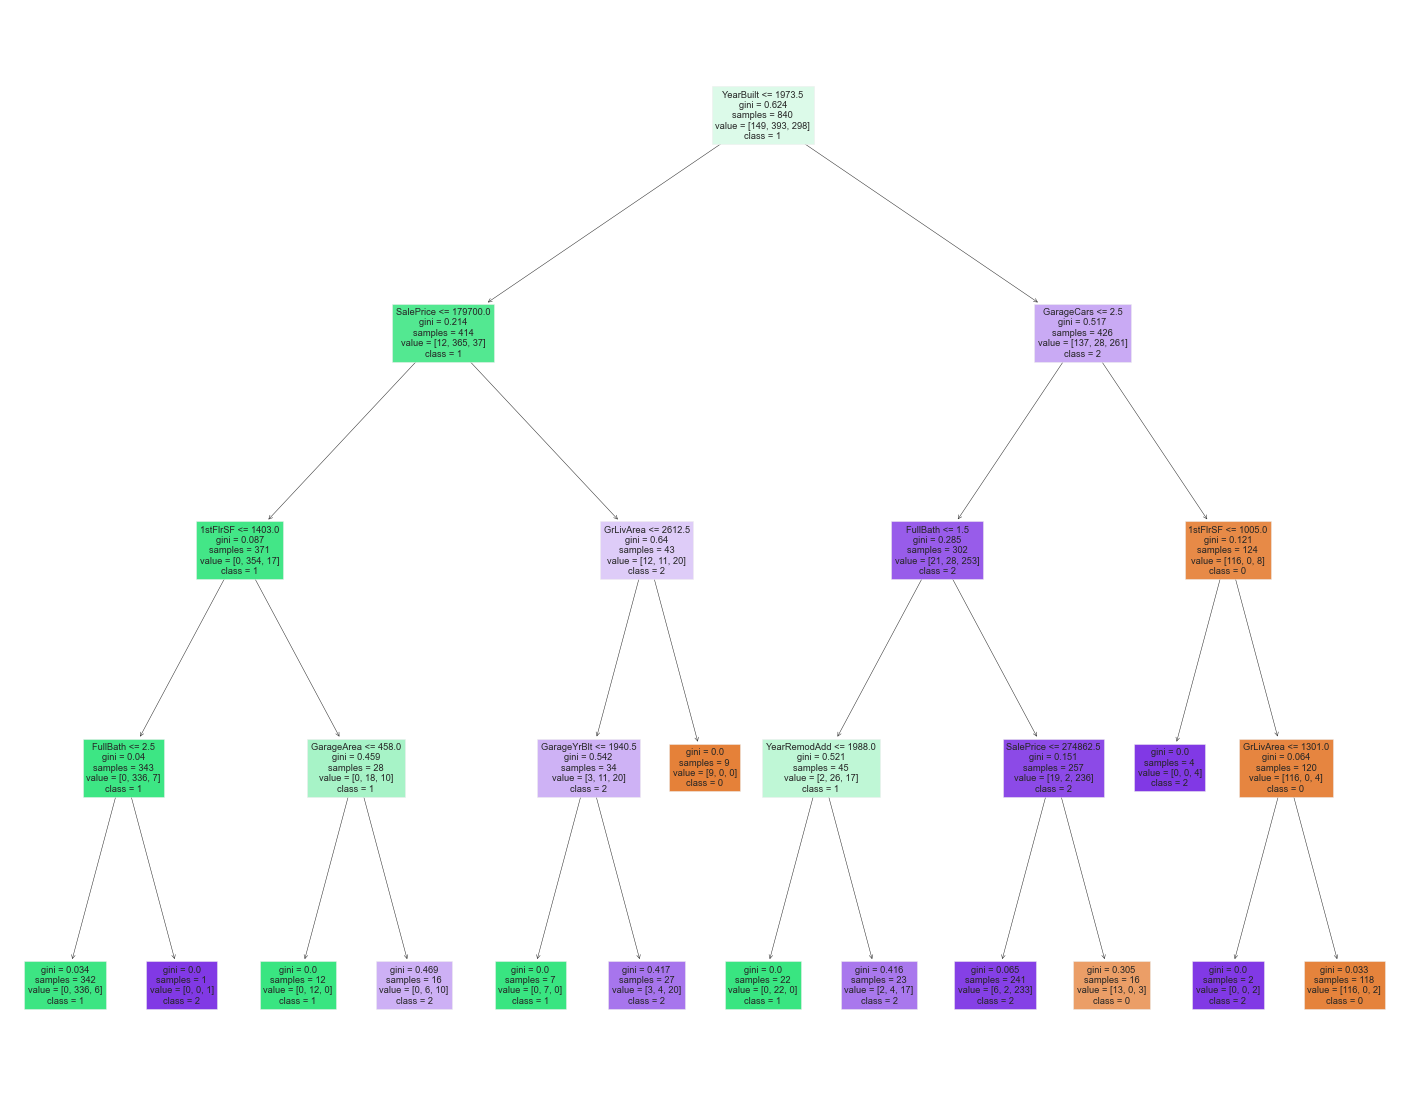

In [57]:
from sklearn import tree

fig = plt.figure(figsize= (25, 20)) #Le indicamos las dimensiones del gráfico

tree.plot_tree(arbol_ventas, feature_names = list(arbolDF.columns), class_names=['0','1','2'], filled=True)
plt.show()
fig.savefig('Arbol.png')

In [ ]:
Explicación: 

7. Elabore el árbol de regresión para predecir el precio de las viviendas utilizando el conjunto 
de entrenamiento.  Explique los resultados a los que llega. Muestre el modelo gráficamente. 
El experimento debe ser reproducible por lo que debe fijar que los conjuntos de 
entrenamiento y prueba sean los mismos siempre que se ejecute el código.

In [9]:
from sklearn.tree import DecisionTreeRegressor

dtReg = DecisionTreeRegressor(random_state = 0)

dtReg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [10]:
y_predict_dtr = dtReg.predict((x_test))

from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_dtr)
print("Error asociado al Arbol de Regresión: ", r_square)

Error asociado al Arbol de Regresión:  0.7188153414182448


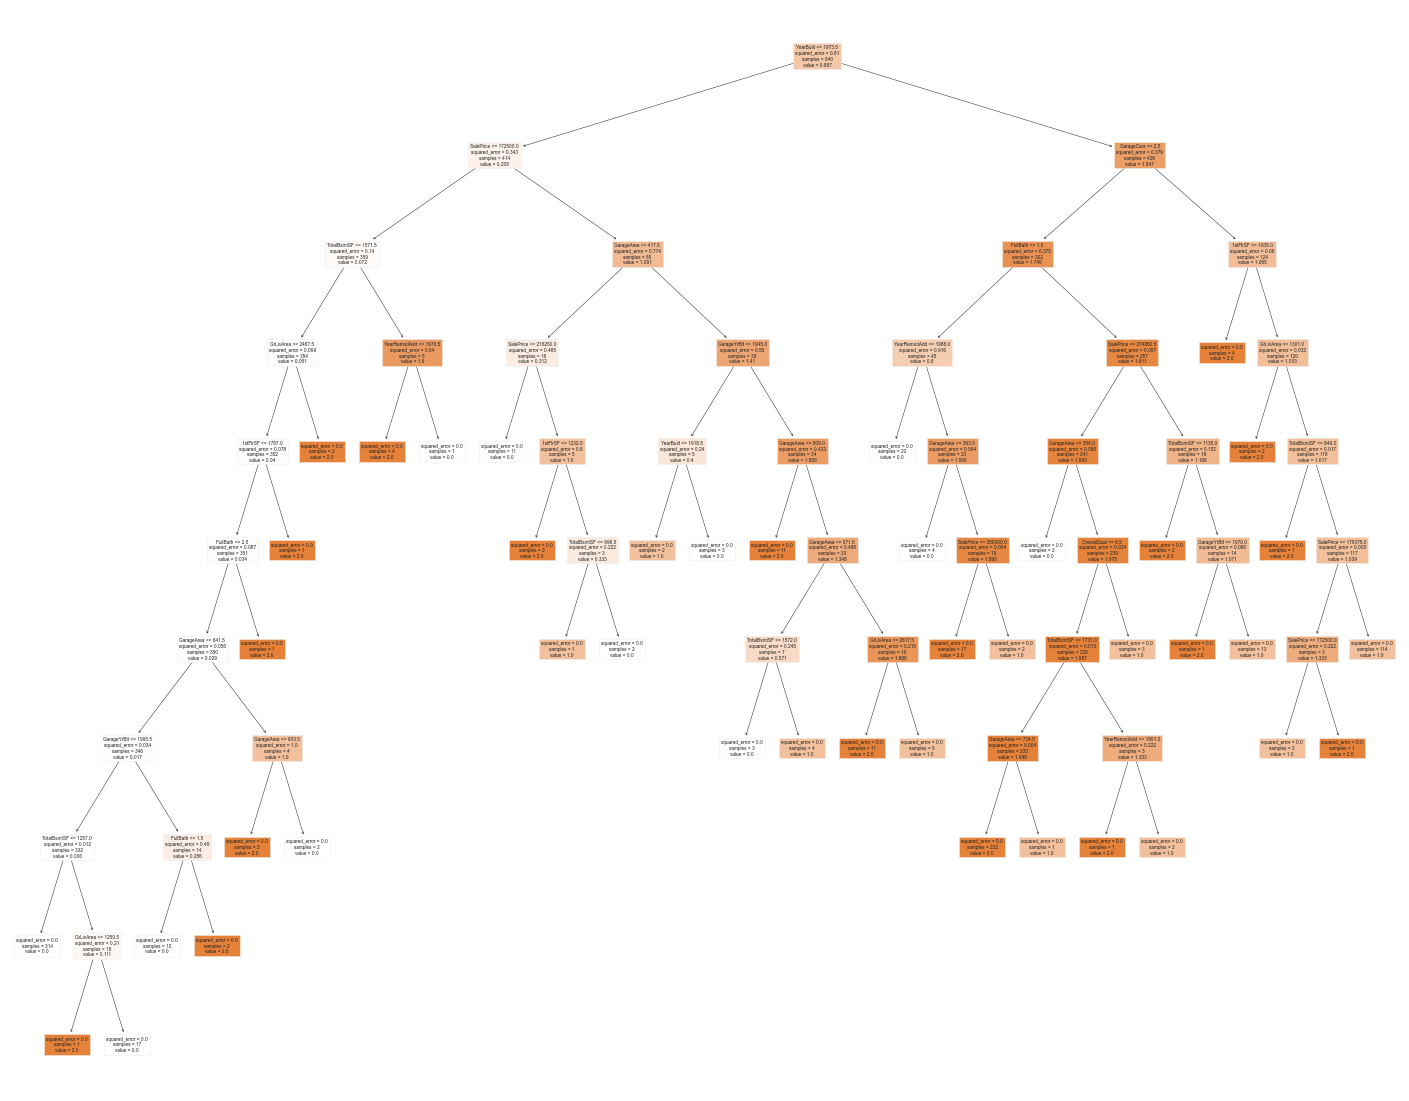

In [15]:
from sklearn import tree

fig = plt.figure(figsize= (25, 20)) #Le indicamos las dimensiones del gráfico

tree.plot_tree(dtReg, feature_names = list(arbolDF.columns), class_names=['0','1','2'], filled=True)
plt.show()